# Examine Matt's experiments:

raijin:/short/v19/mtc599/mom5/mom_cafe/mom_mac: source code, atmosphere is same as used in jul18b experiment. 

raijin:/short/v19/mtc599/ao_am2/nov17n/out23/ #An experiment with nominal year climatology
 
raijin:/short/v19/mtc599/ao_am2/jul18b #Another experiment, but with time-varying atmospheric fields, 1980-2009. submit.ksh run script.


raijin:/g/data1a/v14/tok599/atmos_forcing/CMIP5/gfdl_cm2.1.forcings.tgz
 
it should contain the following data
 
ghgs: *gblannualdata
ozone concentrations: CM3_CMIP5_ACC_SPARC_1850-2009_T3M_O3.nc
aerosol concentrations: aerosol.climatology.nc
solar: CMIP5_1610-2008_monthly_data_b18
volcano: *sw_data.nc
landuse: landuse.nc
 
if some data is missing then you should contact Vaishali Naik - NOAA Federal vaishali.naik@noaa.gov

raijin:/short/v19/mtc599/ao_am2/aug18b #Another experiment, with sw* radiative forcings files that include volcanoes.
atmos_month includes:
1. swdn_sfc
2. swup_sfc
3. swdn_toa
4. swup_toa
atmos_daily includes:
1. lwflx net (down-up) LW surface
2. shflx sensible surface
3. lwdn_sfc down LW surface
4. olr (up LW) TOA
5. swdn_sfc SW surface
6. swup_toa SW TOA
7. evap surface: 1mm/day of evaporation equals 28.94 W/m^2
>from 1. & 3 can calculate 'up' LW surface
summary: use sw from monthly (rsds,rsus,rsdt,rsut), and daily longwave (rlds,rlus,rlut), sensible (hfss), latent (hfls).
                               ^    ^ surface                            ^    ^
                                         ^    ^ TOA                                ^
                                         
surface_balance = hfss + hfls + rsds + rsus + rlds + rlus
toa_balance = rsdt + rsut + rlut

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
print('BEGIN')

import socket
import re
import os
import sys
import inspect
import pickle
import glob
#import sort

import socket
import re
import os
import sys

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
  topdir_vm='/OSM/CBR/OA_DCFP/data/CAFEPP/'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import numpy.ma as ma
from matplotlib.mlab import griddata

from decadal_diag import \
  fractional_year_from_num2date, \
  generate_daily_month_indices, \
  shade_2d_latlon, \
  get_timestamp_number, \
  shade_2d_curvilinear, \
  shade_2d_simple, \
  nino_indices, \
  plot_xy, \
  fractional_year_from_num2date

from n_data_funcs import n_data_funcs
  
cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', \
  5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}

fluxes_colors={'hfls':'red', 'hfss':'blue', 'rlds':'green', 'rlus':'orange', \
               'rlut':'pink', 'rsdt':'brown', 'rsus':'cyan', 'rsds':'purple', 'rsut':'grey', \
              'net down toa':'tan', 'net down surf':'yellow'}

%matplotlib inline

CRED = '\033[91m'
CEND = '\033[0m'

#print(cafe_experiment_titles[1])

print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
END


BEGIN
access13_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/g/data1/ua6/drstree/CMIP5/GCM/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/r1i1p1/tas/latest/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]
ncepr1_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/g/data/r67/mac599/data/NCEP_R1/air.2m.mon.mean.nc']]
ncepr2_daily_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/daily_averages/air.2m.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/daily_averages/air.2m.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/daily_averages/air.2m.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/daily_averages/air.2m.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/daily_averages/air.2m.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/daily_averages/air.2m.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/daily_averages/air.2m.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAF

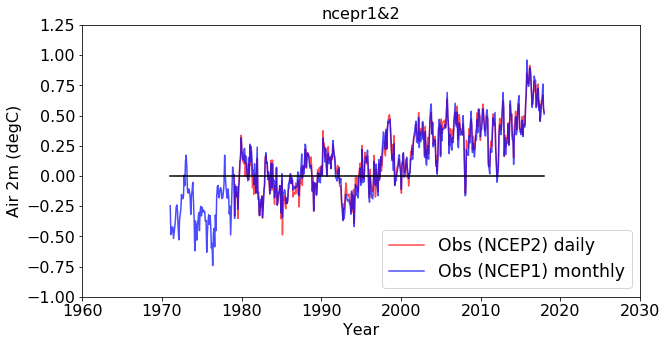

Processing daily cafe nov17n ...
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
calculate_quantity: value_split= ['latlon_region']
n_data_funcs.calculate_quantity: Using whole lat/lon region or that specified in instance.
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.
Processing daily cafe jul18b ...
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
calculate_quantity: value_split= ['latlon_region']
n_data_funcs.calculate_quantity: Using whole lat/lon region or that specified in instance.
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.
Processing daily cafe aug18b ...
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one

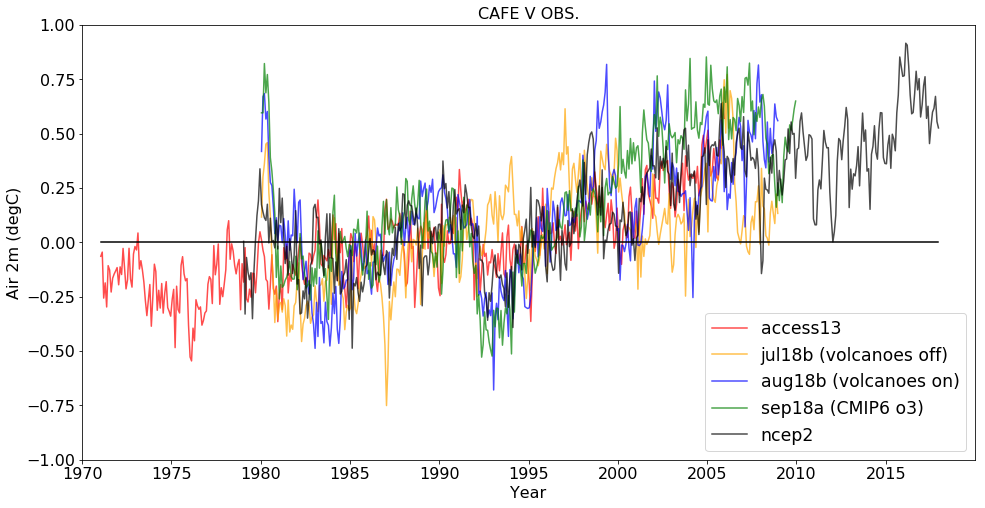

Doing some integrity checks...
END


In [12]:
print('BEGIN')

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  NINO=True #as SST can be used for NINO or other calculations, need to have a logical.
  NINO=False
  
  if(NINO): nino_index_k=0
  
#===============================================================================

  ivar_str_access13='rlut';offset_access13=0.0;scale_access13=1.0;long_name_access13='Outgoing LW radiation';short_name_access13='OLR';units_access13='W/m^2';table_access13='Amon'
  ivar_str_access13='tas';offset_access13=0.0;scale_access13=1.0;long_name_access13='Air 2m Temperature';short_name_access13='Air 2m';units_access13='degC';table_access13='Amon'
#   ivar_str_access13='tos';offset_access13=0.0;scale_access13=1.0;long_name_access13='Sea Surface Temperature';short_name_access13='SST';units_access13='degC';table_access13='Omon'
  
  grid_label_access13='ncep_r1'
  access13_calendar='proleptic_gregorian'
  
  if(ivar_str_access13=='tos'):
    idir=topdir_vm+'g/data1/ua6/drstree/CMIP5/GCM/CSIRO-BOM/ACCESS1-3/historical/mon/ocean/r1i1p1/'+ivar_str_access13+'/latest'
    access13_monthly_files=[[idir+'/'+ivar_str_access13+'_Omon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]
  else:
    idir=topdir_vm+'g/data1/ua6/drstree/CMIP5/GCM/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/r1i1p1/'+ivar_str_access13+'/latest'
    access13_monthly_files=[[idir+'/'+ivar_str_access13+'_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]
  
  print('access13_monthly_files=',access13_monthly_files)

#===============================================================================

  #monthly inputs
  product='ncepr1'
  ivar_str_ncepr1='skt';ifil_prefix_ncepr1='skt';offset_ncepr1=0.0;scale_ncepr1=1.0;long_name_ncepr1='Surface Temperature';short_name_ncepr1='SST';units_ncepr1='degC'
  ivar_str_ncepr1='air';ifil_prefix_ncepr1='air.2m';offset_ncepr1=0.0;scale_ncepr1=1.0;long_name_ncepr1='Air 2m Temperature';short_name_ncepr1='Air 2m';units_ncepr1='degC'
#   ivar_str_ncepr1='uswrf';ifil_prefix_ncepr1='uswrf.ntat';offset_ncepr1=0.0;scale_ncepr1=1.0;long_name_ncepr1='Outgoing SW radiation';short_name_ncepr1='OSR';units_ncepr1='W/m^2'
#   ivar_str_ncepr1='ulwrf';ifil_prefix_ncepr1='ulwrf.ntat';offset_ncepr1=0.0;scale_ncepr1=1.0;long_name_ncepr1='Outgoing LW radiation';short_name_ncepr1='OLR';units_ncepr1='W/m^2'
#   grid_label_ncepr1='ncep1'
  ncepr1_calendar='proleptic_gregorian'
  idir=topdir_vm+'short/r67/mac599/data/NCEP_R1'
  idir=topdir_vm+'g/data/r67/mac599/data/NCEP_R1'
  ncepr1_monthly_files=[[idir+'/'+ifil_prefix_ncepr1+'.mon.mean.nc']]
  
  #daily inputs
  product='ncepr1'
  ivar_str_ncepr2='skt';ifil_prefix_ncepr2='skt.sfc';offset_ncepr2=0.0;scale_ncepr2=1.0;long_name_ncepr2='Surface Temperature';short_name_ncepr2='SST';units_ncepr2='degC'
  ivar_str_ncepr2='air';ifil_prefix_ncepr2='air.2m';offset_ncepr2=0.0;scale_ncepr2=1.0;long_name_ncepr2='Air 2m Temperature';short_name_ncepr2='Air 2m';units_ncepr2='degC'
#   ivar_str_ncepr2='uswrf';ifil_prefix_ncepr2='uswrf.ntat';offset_ncepr2=0.0;scale_ncepr2=1.0;long_name_ncepr2='Outgoing SW radiation';short_name_ncepr2='OSR';units_ncepr2='W/m^2'
#   ivar_str_ncepr2='ulwrf';ifil_prefix_ncepr2='ulwrf.ntat';offset_ncepr2=0.0;scale_ncepr2=1.0;long_name_ncepr2='Outgoing LW radiation';short_name_ncepr2='OLR';units_ncepr2='W/m^2'
#   grid_label='ncep2'    
  ncepr2_calendar='proleptic_gregorian'
  idir=topdir_vm+'short/v14/mac599/ncep2/daily_averages'
  ncepr2_daily_files=[sorted( \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.197?.nc')+ \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.198?.nc')+ \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.199?.nc')+ \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.200?.nc')+ \
    glob.glob(idir+'/'+ifil_prefix_ncepr2+'.gauss.201?.nc') \
    )]

  print('ncepr1_monthly_files=',ncepr1_monthly_files)
  print('ncepr2_daily_files=',ncepr2_daily_files)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  product='HadISST'

  ivar_str_hadisst='tos';ifil_prefix_hadisst='tos';offset=273.15;scale=1.0;long_name='Surface Temperature';units='degC'

  grid_label='hadisst'
  hadisst_calendar='proleptic_gregorian'

  hadisst_files=[]
  idir=topdir_vm+'g/data/r67/CMIP5/common_restricted/CMIP5/output/Hadley/HadISST/1d/mon/ocean/Omon/r1i1p1/v20170110/tos'
  ifils=[ifil_prefix_hadisst+'_Omon_HadISST_1d_r1i1p1_187001-201512.nc']
  for file in ifils:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      hadisst_files.append(idir+'/'+file)  
  hadisst_files=[hadisst_files]

  print('hadisst_files=',hadisst_files)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#==============================================================================

  model='CAFE'
  grid_label='gn'

  ivar_str_cafe='tos';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Sea Surface Temperature';short_name_cafe='SST';units_cafe='degC';table_cafe='Oday'
  ivar_str_cafe='tas';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Air 2m Temperature';short_name_cafe='Air 2m';units_cafe='degC';table_cafe='day'
#   ivar_str_cafe='swuptoa';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing SW radiation';short_name_cafe='OSR';units_cafe='W/m^2';table_cafe='day'
#   ivar_str_cafe='rlut';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing LW radiation';short_name_cafe='OLR';units_cafe='W/m^2';table_cafe='day'

#   print('aaa')
#   print(topdir)

  ensemble=1
  pval=11
  
  if(ivar_str_cafe!='tos'):
    cafe_daily_files_nov17n=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table_cafe+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    daily_ifils_nov17n=[ivar_str_cafe+'_'+table_cafe+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_02000101-02391231.nc']
    for file in daily_ifils_nov17n:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_daily_files_nov17n.append(idir+'/'+file)
    cafe_daily_files_nov17n=[cafe_daily_files_nov17n]
    print('cafe_daily_files_nov17n=',cafe_daily_files_nov17n)

  else:
    ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Omon'

    cafe_monthly_files_nov17n=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    monthly_ifils_nov17n=[ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_020001-023912.nc']
    for file in monthly_ifils_nov17n:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_monthly_files_nov17n.append(idir+'/'+file)
    cafe_monthly_files_nov17n=[cafe_monthly_files_nov17n]

    print('cafe_monthly_files_nov17n=',cafe_monthly_files_nov17n)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  model='CAFE'
  grid_label='gn'
    
  ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Oday'
  ivar_str_cafe='tas';offset=0.0;scale=1.0;long_name='Air 2m Temperature';short_name='Air 2m';units='degC';table='day'
#   ivar_str_cafe='swuptoa';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing SW radiation';short_name_cafe='OSR';units_cafe='W/m^2';table_cafe='day'
#   ivar_str_cafe='rlut';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing LW radiation';short_name_cafe='OLR';units_cafe='W/m^2';table_cafe='day'

  ensemble=1
  pval=12
  
  if(ivar_str_cafe!='tos'):
    cafe_daily_files_jul18b=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table_cafe+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    daily_ifils_jul18b=[ivar_str_cafe+'_'+table_cafe+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_19800101-20081231.nc']
    for file in daily_ifils_jul18b:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_daily_files_jul18b.append(idir+'/'+file)
    cafe_daily_files_jul18b=[cafe_daily_files_jul18b]
    print('cafe_daily_files_jul18b=',cafe_daily_files_jul18b)
    
  else:
    ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Omon'

    cafe_monthly_files_jul18b=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    monthly_ifils_jul18b=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_198001-200812.nc']
    for file in monthly_ifils_jul18b:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_monthly_files_jul18b.append(idir+'/'+file)
    cafe_monthly_files_jul18b=[cafe_monthly_files_jul18b]

    print('cafe_monthly_files_jul18b=',cafe_monthly_files_jul18b)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  model='CAFE'
  grid_label='gn'
    
  ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Oday'
  ivar_str_cafe='tas';offset=0.0;scale=1.0;long_name='Air 2m Temperature';short_name='Air 2m';units='degC';table='day'
#   ivar_str_cafe='swuptoa';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing SW radiation';short_name_cafe='OSR';units_cafe='W/m^2';table_cafe='day'
#   ivar_str_cafe='rlut';offset_cafe=0.0;scale_cafe=1.0;long_name_cafe='Outgoing LW radiation';short_name_cafe='OLR';units_cafe='W/m^2';table_cafe='day'

  ensemble=1
  pval=13
  
  if(ivar_str_cafe!='tos'):
      
    cafe_daily_files_aug18b=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table_cafe+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    daily_ifils_aug18b=[ivar_str_cafe+'_'+table_cafe+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_19800101-20081231.nc']
    for file in daily_ifils_aug18b:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_daily_files_aug18b.append(idir+'/'+file)
    cafe_daily_files_aug18b=[cafe_daily_files_aug18b]
    print('cafe_daily_files_aug18b=',cafe_daily_files_aug18b)

  else:
    ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Omon'

    cafe_monthly_files_aug18b=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    monthly_ifils_aug18b=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_198001-200812.nc']
    for file in monthly_ifils_aug18b:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_monthly_files_aug18b.append(idir+'/'+file)
    cafe_monthly_files_aug18b=[cafe_monthly_files_aug18b]

    print('cafe_monthly_files_aug18b=',cafe_monthly_files_aug18b)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  ensemble=1
  pval=14
  
  if(ivar_str_cafe!='tos'):
      
    cafe_daily_files_sep18a=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table_cafe+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    daily_ifils_sep18a=[ivar_str_cafe+'_'+table_cafe+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_19800101-20091231.nc']
    for file in daily_ifils_sep18a:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_daily_files_sep18a.append(idir+'/'+file)
    cafe_daily_files_sep18a=[cafe_daily_files_sep18a]
    print('cafe_daily_files_sep18a=',cafe_daily_files_sep18a)

  else:
    ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Omon'

    cafe_monthly_files_sep18a=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    monthly_ifils_sep18a=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_198001-200912.nc']
    for file in monthly_ifils_sep18a:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_monthly_files_sep18a.append(idir+'/'+file)
    cafe_monthly_files_sep18a=[cafe_monthly_files_sep18a]

    print('cafe_monthly_files_sep18a=',cafe_monthly_files_sep18a)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  AnnOut=False
  #AnnOut=True
  
  ZeroClim=False
  #ZeroClim=True
  
#===============================================================================

  print(CRED+'Processing monthly HadISST ...'+CEND)
  
  cbeg=1971
  cend=2000
  abeg=1971
  aend=2015

  if(NINO):
    hadisst_nino_indices=nino_indices(Diag=True, grid_label='hadisst', index_selection='ALL')
  
  hadisst_file_var_from_monthly=n_data_funcs(Diag=False, input_files=hadisst_files, input_var_name=ivar_str_hadisst)

  hadisst_file_var_from_monthly.calculate_filedatetime_info(Diag=False, calendar='proleptic_gregorian')

  hadisst_file_var_from_monthly.get_latlon_info(Diag=False)

  if(NINO):
    hadisst_nino_indices.auto_lat_lon(Diag=False, instance_nino=hadisst_nino_indices, instance_data=hadisst_file_var_from_monthly)
    hadisst_monthly_quantity_from_monthly=hadisst_file_var_from_monthly.calculate_quantity(hadisst_nino_indices, Diag=True,quantity='nino') 
  else:
    hadisst_monthly_quantity_from_monthly=hadisst_file_var_from_monthly.calculate_quantity('dummy', Diag=True,quantity='latlon_region') 
    
  #hadisst_nino_indices.check_lat_lon(Diag=False, instance_nino=hadisst_nino_indices, instance_data=hadisst_file_var)
  
  hadisst_quantity_monthlyclimatology_from_monthly, hadisst_quantity_monthlyanomaly_from_monthly=hadisst_file_var_from_monthly.monthly_clim_anom( \
    Diag=False, input=hadisst_monthly_quantity_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
    
#   input_datas=(hadisst_nino_monthlyanomaly[:,nino_index_k],)
#   input_xvals=(hadisst_file_var.year_fraction_anomaly,)
  
#   input_xval=hadisst_file_var.year_fraction_anomaly
#   input_datas,input_xvals = (),()
#   for n in range(0,4):
#     input_datas = input_datas + (hadisst_nino_monthlyanomaly[:,n],)
#     input_xvals = input_xvals + (input_xval,)

#   plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
#     title='HadISST', \
#     units='$\!^\circ$C', \
#     xlab='Year', \
#     ylab=hadisst_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(10,5))
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  print(CRED+'Processing monthly ACCESS13 ...'+CEND)

  cbeg=1981
  cend=2000
  abeg=1971
  aend=2005
  
  grid_label='access13'
  
  if(NINO and ivar_str_access13=='tos'):
    access13_nino_indices=nino_indices(Diag=True, grid_label=grid_label, index_selection='ALL')
  
  access13_monthly_files=n_data_funcs(input_files=access13_monthly_files, input_var_name=ivar_str_access13)
  
  access13_monthly_files.calculate_filedatetime_info(calendar='proleptic_gregorian')
  
  access13_monthly_files.get_latlon_info(Diag=False)
  
  if(NINO and ivar_str_access13=='tos'):
    access13_nino_indices.auto_lat_lon(Diag=False, instance_nino=access13_nino_indices, instance_data=access13_monthly_files)
    access13_monthly_quantity_from_monthly=access13_monthly_files.calculate_quantity(access13_nino_indices, quantity='nino')
  else:
    access13_monthly_quantity_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

  access13_quantity_monthlyclimatology_from_monthly, access13_quantity_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
    Diag=False, input=access13_monthly_quantity_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('access13_quantity_monthlyanomaly_from_monthly.shape=',access13_quantity_monthlyanomaly_from_monthly.shape)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  print(CRED+'Processing monthly NCEP...'+CEND) #1948-2018
  
  cbeg=1981
  cend=2000
  abeg=1971
  aend=2017
  
  #monthly inputs
  if(NINO and ifil_prefix_ncepr1=='skt'):
    ncepr1_nino_indices=nino_indices(Diag=True,grid_label='ncep1',index_selection='ALL')
  
  ncepr1_file_var_from_monthly=n_data_funcs(Diag=False, input_files=ncepr1_monthly_files, input_var_name=ivar_str_ncepr1)

  ncepr1_file_var_from_monthly.calculate_filedatetime_info(Diag=False,calendar=ncepr1_calendar)

  ncepr1_file_var_from_monthly.get_latlon_info(Diag=False)

  if(NINO and ifil_prefix_ncepr1=='skt'):
    ncepr1_nino_indices.auto_lat_lon(Diag=False, instance_nino=ncepr1_nino_indices, instance_data=ncepr1_file_var_from_monthly)
    ncepr1_monthly_quantity_from_monthly=ncepr1_file_var_from_monthly.calculate_quantity(ncepr1_nino_indices, Diag=True, quantity='nino')
  else:
    ncepr1_monthly_quantity_from_monthly=ncepr1_file_var_from_monthly.calculate_quantity('dummy', Diag=True, quantity='latlon_region') 

  ncepr1_quantity_monthlyclimatology_from_monthly, ncepr1_quantity_monthlyanomaly_from_monthly=ncepr1_file_var_from_monthly.monthly_clim_anom( \
    Diag=False, input=ncepr1_monthly_quantity_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print(CRED+'Processing daily NCEP...'+CEND) #1979-2018

  cbeg=1981
  cend=2000
  abeg=1979
  aend=2017
  
  #daily inputs  
  if(ifil_prefix_ncepr2=='skt.sfc'):
    ncepr2_nino_indices=nino_indices(Diag=True, grid_label='ncep2', index_selection='ALL')  
  
  ncepr2_file_var_from_daily=n_data_funcs(Diag=False, input_files=ncepr2_daily_files, input_var_name=ivar_str_ncepr2)

  ncepr2_file_var_from_daily.calculate_filedatetime_info(Diag=False, calendar=ncepr2_calendar)

  ncepr2_file_var_from_daily.get_latlon_info(Diag=False)

  if(NINO and ifil_prefix_ncepr2=='skt.sfc'):
    ncepr2_nino_indices.auto_lat_lon(Diag=False, instance_nino=ncepr2_nino_indices, instance_data=ncepr2_file_var_from_daily)
    ncepr2_quantity_daily=ncepr2_file_var_from_daily.calculate_quantity(ncepr2_nino_indices, quantity='nino')
  else:
    ncepr2_quantity_daily=ncepr2_file_var_from_daily.calculate_quantity('dummy', quantity='latlon_region')
    
  if(ifil_prefix_ncepr2!='skt.sfc'):
    ncepr2_quantity_daily=np.squeeze(ncepr2_quantity_daily)

  ncepr2_file_var_from_daily.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.
    
  ncepr2_monthly_quantity_from_daily=ncepr2_file_var_from_daily.daily_to_monthly(EndOption=1,input=ncepr2_quantity_daily)
  
  ncepr2_quantity_monthlyclimatology_from_daily, ncepr2_quantity_monthlyanomaly_from_daily=ncepr2_file_var_from_daily.monthly_clim_anom( \
    Diag=False, input=ncepr2_monthly_quantity_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  ###
  if(ifil_prefix_ncepr2=='skt.sfc'):
    input_datas = (ncepr2_quantity_monthlyanomaly_from_daily[:,0],)
    input_xvals = (ncepr2_file_var_from_daily.year_fraction_anomaly,)    
  else:
    input_datas = (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_daily[:],axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
    input_xvals = (ncepr2_file_var_from_daily.year_fraction_anomaly,)

  if(ifil_prefix_ncepr1=='skt'):
    input_datas = input_datas + (ncepr1_quantity_monthlyanomaly_from_monthly[:,0],)
    input_xvals = input_xvals + (ncepr1_file_var_from_monthly.year_fraction_anomaly,)
  else:
    input_datas = input_datas + (np.average(np.average(ncepr1_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=ncepr1_file_var_from_monthly.clat[:]),axis=1),)
    input_xvals = input_xvals + (ncepr1_file_var_from_monthly.year_fraction_anomaly,)

  plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
    title='ncepr1&2', \
    units=units_ncepr2, \
    xlab='Year', \
    ylab=short_name_ncepr2+' ('+units_ncepr2+')', \
    zero2=True, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    line_colors=['red','blue'], \
    line_labels=['Obs (NCEP2) daily','Obs (NCEP1) monthly'], \
    xysize=(10,5))
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cbeg=200
  cend=239
  abeg=200
  aend=239
  
  if(ivar_str_cafe!='tos'):
    print(CRED+'Processing daily cafe nov17n ...'+CEND)
    
    cafe_daily_files_nov17n=n_data_funcs(input_files=cafe_daily_files_nov17n,input_var_name=ivar_str_cafe)

    cafe_daily_files_nov17n.calculate_filedatetime_info(calendar='noleap')

    cafe_daily_files_nov17n.get_latlon_info(Diag=False)

    cafe_quantity_daily_nov17n=cafe_daily_files_nov17n.calculate_quantity('dummy', quantity='latlon_region')

    cafe_daily_files_nov17n.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

    cafe_monthly_quantity_from_daily_nov17n=cafe_daily_files_nov17n.daily_to_monthly(EndOption=1,input=cafe_quantity_daily_nov17n)                                               

    cafe_quantity_monthlyclimatology_from_daily_nov17n, cafe_quantity_monthlyanomaly_from_daily_nov17n=cafe_daily_files_nov17n.monthly_clim_anom( \
      Diag=False, input=cafe_monthly_quantity_from_daily_nov17n, AnnOut=AnnOut, ZeroClim=ZeroClim, \
      cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  else:
    print(CRED+'Processing monthly cafe nov17n ...'+CEND)
    
    if(NINO and ivar_str_cafe=='tos'):
      cafe_nov17n_nino_indices=nino_indices(Diag=True, grid_label='gn', index_selection='ALL')

    cafe_monthly_files_nov17n=n_data_funcs(input_files=cafe_monthly_files_nov17n, input_var_name=ivar_str_cafe)

    cafe_monthly_files_nov17n.calculate_filedatetime_info(calendar='noleap')

    cafe_monthly_files_nov17n.get_latlon_info(Diag=False,lat='latitude',lon='longitude')

    if(NINO and ivar_str_cafe=='tos'):
      cafe_nov17n_nino_indices.auto_lat_lon(Diag=False, instance_nino=cafe_nov17n_nino_indices, instance_data=cafe_monthly_files_nov17n)
      cafe_quantity_monthly_nov17n=cafe_monthly_files_nov17n.calculate_quantity(cafe_nov17n_nino_indices, quantity='nino')
    else:
      cafe_quantity_monthly_nov17n=cafe_monthly_files_nov17n.calculate_quantity('dummy', quantity='latlon_region')

    cafe_quantity_monthlyclimatology_from_monthly_nov17n, cafe_quantity_monthlyanomaly_from_monthly_nov17n=cafe_monthly_files_nov17n.monthly_clim_anom( \
      Diag=False, input=cafe_quantity_monthly_nov17n, AnnOut=False, ZeroClim=ZeroClim, \
      cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
#   #print('cafe_nino_monthly_anomaly_from_daily_nov17n.shape=',cafe_nino_monthly_anomaly_from_daily_nov17n.shape)

#   #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   input_datas = (cafe_nino_monthlyanomaly_from_monthly_nov17n[:,nino_index_k],)
#   input_xvals = (cafe_monthly_files_nov17n.year_fraction_anomaly,)
  
#   input_datas = input_datas + (ncepr2_nino_monthlyanomaly_from_monthly[:,nino_index_k],)
#   input_xvals = input_xvals + (ncepr2_file_var_from_monthly.year_fraction_anomaly,)
  
#   plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
#     title='CAFE nov17n', \
#     units='$\!^\circ$C', \
#     xlab='Year', \
#     ylab=cafe_nov17n_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(10,5), \
#     line_colors=['red','blue'], \
#     line_labels=['nov17n monthly','ncep2'] \
#     )
             
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  cbeg=1981
  cend=2000
  abeg=1980
  aend=2008
  
  if(ivar_str_cafe!='tos'):
    print(CRED+'Processing daily cafe jul18b ...'+CEND)
  
    cafe_daily_files_jul18b=n_data_funcs(input_files=cafe_daily_files_jul18b, input_var_name=ivar_str_cafe)

    cafe_daily_files_jul18b.calculate_filedatetime_info(calendar='noleap')

    cafe_daily_files_jul18b.get_latlon_info(Diag=False)

    cafe_quantity_daily_jul18b=cafe_daily_files_jul18b.calculate_quantity('dummy', quantity='latlon_region')

    cafe_daily_files_jul18b.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

    cafe_monthly_quantity_from_daily_jul18b=cafe_daily_files_jul18b.daily_to_monthly(EndOption=1, input=cafe_quantity_daily_jul18b)

    cafe_quantity_monthlyclimatology_from_daily_jul18b, cafe_quantity_monthlyanomaly_from_daily_jul18b=cafe_daily_files_jul18b.monthly_clim_anom( \
      Diag=False, input=cafe_monthly_quantity_from_daily_jul18b, AnnOut=AnnOut, ZeroClim=ZeroClim, \
      cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  else:
    print(CRED+'Processing monthly cafe jul18b ...'+CEND)

    if(NINO and ivar_str_cafe=='tos'):
      cafe_jul18b_nino_indices=nino_indices(Diag=True,grid_label='gn', index_selection='ALL')

    cafe_monthly_files_jul18b=n_data_funcs(input_files=cafe_monthly_files_jul18b, input_var_name=ivar_str_cafe)

    cafe_monthly_files_jul18b.calculate_filedatetime_info(calendar='noleap')

    cafe_monthly_files_jul18b.get_latlon_info(Diag=False, lat='latitude', lon='longitude')

    if(NINO and ivar_str_cafe=='tos'):
      cafe_jul18b_nino_indices.auto_lat_lon(Diag=False, instance_nino=cafe_jul18b_nino_indices, instance_data=cafe_monthly_files_jul18b)
      cafe_quantity_monthly_jul18b=cafe_monthly_files_jul18b.calculate_quantity(cafe_jul18b_nino_indices, quantity='nino')
    else:
      cafe_quantity_monthly_jul18b=cafe_monthly_files_jul18b.calculate_quantity('dummy', quantity='latlon_region')

    cafe_quantity_monthlyclimatology_from_monthly_jul18b, cafe_quantity_monthlyanomaly_from_monthly_jul18b=cafe_monthly_files_jul18b.monthly_clim_anom( \
      Diag=False, input=cafe_quantity_monthly_jul18b, AnnOut=AnnOut, ZeroClim=ZeroClim, \
      cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
#   #print('cafe_nino_monthly_anomaly_from_daily_jul18b.shape=',cafe_nino_monthly_anomaly_from_daily_jul18b.shape)

#   #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   input_datas = (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_daily[:],axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
#   input_xvals = (ncepr2_file_var_from_daily.year_fraction_anomaly,)

#   input_datas = input_datas + (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=ncepr2_file_var_from_monthly.clat[:]),axis=1),)
#   input_xvals = input_xvals + (ncepr2_file_var_from_monthly.year_fraction_anomaly,)  
  
#   input_datas = (np.average(np.average(access13_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=access13_monthly_files.clat[:]),axis=1),)
#   input_xvals = (access13_monthly_files.year_fraction_anomaly,)
  
#   input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_jul18b[:],axis=1,weights=cafe_daily_files_jul18b.clat[:]),axis=1),)
#   input_xvals = input_xvals + (cafe_daily_files_jul18b.year_fraction_anomaly,)
  
#   input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_nov17n[:],axis=1,weights=cafe_daily_files_jul18b.clat[:]),axis=1),)
#   input_xvals = input_xvals + (cafe_daily_files_nov17n.year_fraction_anomaly+1780.0,) #put on approx. same time axis.
  
# #from monthly ncepr1
# #   input_datas = input_datas + (np.average(np.average(ncepr1_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=ncepr1_file_var_from_monthly.clat[:]),axis=1),)
# #   input_xvals = input_xvals + (ncepr1_file_var_from_monthly.year_fraction_anomaly,)
  
# #from daily ncepr2
#   input_datas = input_datas + (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_daily[:],axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
#   input_xvals = input_xvals + (ncepr2_file_var_from_daily.year_fraction_anomaly,)
  
#   plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
#     title='CAFE V OBS.', \
#     units=units_cafe, \
#     xlab='Year', \
#     ylab=short_name_cafe+' ('+units_cafe+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(16,8), \
#     line_colors=['red','blue','green','black'], \
#     line_labels=['access13','jul18b (external forcings on)','nov17n (external forcings off)','ncep2'] \
#     )
             
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  cbeg=1981
  cend=2000
  abeg=1980
  aend=2008
  
  if(ivar_str_cafe!='tos'):
    print(CRED+'Processing daily cafe aug18b ...'+CEND)
    
    cafe_daily_files_aug18b=n_data_funcs(input_files=cafe_daily_files_aug18b,input_var_name=ivar_str_cafe)

    cafe_daily_files_aug18b.calculate_filedatetime_info(calendar='noleap')

    cafe_daily_files_aug18b.get_latlon_info(Diag=False)

    cafe_quantity_daily_aug18b=cafe_daily_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

    cafe_daily_files_aug18b.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

    cafe_monthly_quantity_from_daily_aug18b=cafe_daily_files_aug18b.daily_to_monthly(EndOption=1,input=cafe_quantity_daily_aug18b)

    cafe_quantity_monthlyclimatology_from_daily_aug18b, cafe_quantity_monthlyanomaly_from_daily_aug18b=cafe_daily_files_aug18b.monthly_clim_anom( \
      Diag=False, input=cafe_monthly_quantity_from_daily_aug18b, AnnOut=AnnOut, ZeroClim=ZeroClim, \
      cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  else:
    print(CRED+'Processing monthly cafe aug18b ...'+CEND)

    if(NINO and ivar_str_cafe=='tos'):
      cafe_aug18b_nino_indices=nino_indices(Diag=True, grid_label='gn', index_selection='ALL')

    cafe_monthly_files_aug18b=n_data_funcs(input_files=cafe_monthly_files_aug18b, input_var_name=ivar_str_cafe)

    cafe_monthly_files_aug18b.calculate_filedatetime_info(calendar='noleap')

    cafe_monthly_files_aug18b.get_latlon_info(Diag=False, lat='latitude', lon='longitude')

    if(NINO and ivar_str_cafe=='tos'):
      cafe_aug18b_nino_indices.auto_lat_lon(Diag=False, instance_nino=cafe_aug18b_nino_indices, instance_data=cafe_monthly_files_aug18b)
      cafe_quantity_monthly_aug18b=cafe_monthly_files_aug18b.calculate_quantity(cafe_aug18b_nino_indices, quantity='nino')
    else:
      cafe_quantity_monthly_aug18b=cafe_monthly_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

    cafe_quantity_monthlyclimatology_from_monthly_aug18b, cafe_quantity_monthlyanomaly_from_monthly_aug18b=cafe_monthly_files_aug18b.monthly_clim_anom( \
      Diag=False, input=cafe_quantity_monthly_aug18b, AnnOut=AnnOut, ZeroClim=ZeroClim, \
      cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
#   #print('cafe_nino_monthly_anomaly_from_daily_jul18b.shape=',cafe_nino_monthly_anomaly_from_daily_jul18b.shape)

#   #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cbeg=1981
  cend=2000
  abeg=1980
  aend=2009
  
  if(ivar_str_cafe!='tos'):
    print(CRED+'Processing daily cafe sep18a ...'+CEND)
    
    cafe_daily_files_sep18a=n_data_funcs(input_files=cafe_daily_files_sep18a,input_var_name=ivar_str_cafe)

    cafe_daily_files_sep18a.calculate_filedatetime_info(calendar='noleap')

    cafe_daily_files_sep18a.get_latlon_info(Diag=False)

    cafe_quantity_daily_sep18a=cafe_daily_files_sep18a.calculate_quantity('dummy', quantity='latlon_region')

    cafe_daily_files_sep18a.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

    cafe_monthly_quantity_from_daily_sep18a=cafe_daily_files_sep18a.daily_to_monthly(EndOption=1,input=cafe_quantity_daily_sep18a)

    cafe_quantity_monthlyclimatology_from_daily_sep18a, cafe_quantity_monthlyanomaly_from_daily_sep18a=cafe_daily_files_sep18a.monthly_clim_anom( \
      Diag=False, input=cafe_monthly_quantity_from_daily_sep18a, AnnOut=AnnOut, ZeroClim=ZeroClim, \
      cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  else:
    print(CRED+'Processing monthly cafe sep18a ...'+CEND)

    if(NINO and ivar_str_cafe=='tos'):
      cafe_sep18a_nino_indices=nino_indices(Diag=True, grid_label='gn', index_selection='ALL')

    cafe_monthly_files_sep18a=n_data_funcs(input_files=cafe_monthly_files_sep18a, input_var_name=ivar_str_cafe)

    cafe_monthly_files_sep18a.calculate_filedatetime_info(calendar='noleap')

    cafe_monthly_files_sep18a.get_latlon_info(Diag=False, lat='latitude', lon='longitude')

    if(NINO and ivar_str_cafe=='tos'):
      cafe_sep18a_nino_indices.auto_lat_lon(Diag=False, instance_nino=cafe_sep18a_nino_indices, instance_data=cafe_monthly_files_sep18a)
      cafe_quantity_monthly_sep18a=cafe_monthly_files_sep18a.calculate_quantity(cafe_sep18a_nino_indices, quantity='nino')
    else:
      cafe_quantity_monthly_sep18a=cafe_monthly_files_sep18a.calculate_quantity('dummy', quantity='latlon_region')

    cafe_quantity_monthlyclimatology_from_monthly_sep18a, cafe_quantity_monthlyanomaly_from_monthly_sep18a=cafe_monthly_files_sep18a.monthly_clim_anom( \
      Diag=False, input=cafe_quantity_monthly_sep18a, AnnOut=AnnOut, ZeroClim=ZeroClim, \
      cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('cafe_quantity_monthlyanomaly_from_daily_sep18a.shape=',cafe_quantity_monthlyanomaly_from_daily_sep18a.shape)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

#   input_datas = (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_daily[:],axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
#   input_xvals = (ncepr2_file_var_from_daily.year_fraction_anomaly,)

#   input_datas = input_datas + (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=ncepr2_file_var_from_monthly.clat[:]),axis=1),)
#   input_xvals = input_xvals + (ncepr2_file_var_from_monthly.year_fraction_anomaly,)  
  
  input_datas = ()
  input_xvals = ()
  
  if(NINO and ivar_str_cafe=='tos'):
    input_datas = input_datas + (access13_quantity_monthlyanomaly_from_monthly[:,nino_index_k],)
    input_datas = input_datas + (cafe_quantity_monthlyanomaly_from_monthly_jul18b[:,nino_index_k],)
    input_datas = input_datas + (cafe_quantity_monthlyanomaly_from_monthly_aug18b[:,nino_index_k],)
    input_datas = input_datas + (cafe_quantity_monthlyanomaly_from_monthly_sep18a[:,nino_index_k],) 
#     input_datas = input_datas + (cafe_quantity_monthlyanomaly_from_monthly_nov17n[:,nino_index_k],)
    input_datas = input_datas + (ncepr2_quantity_monthlyanomaly_from_daily[:,nino_index_k],)
#     input_datas = input_datas + (hadisst_quantity_monthlyanomaly_from_monthly[:,nino_index_k],)
  else:
    input_datas = input_datas + (np.average(np.average(access13_quantity_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat[:]),axis=1),)
    input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_jul18b,axis=1,weights=cafe_daily_files_jul18b.clat[:]),axis=1),)
    input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat[:]),axis=1),)
    input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_sep18a,axis=1,weights=cafe_daily_files_aug18b.clat[:]),axis=1),)
#     input_datas = input_datas + (np.average(np.average(cafe_quantity_monthlyanomaly_from_daily_nov17n,axis=1,weights=cafe_daily_files_jul18b.clat[:]),axis=1),)
    input_datas = input_datas + (np.average(np.average(ncepr2_quantity_monthlyanomaly_from_daily,axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
#     input_datas = input_datas + (np.average(np.average(hadisst_quantity_monthlyanomaly_from_monthly,axis=1,weights=ncepr2_file_var_from_daily.clat[:]),axis=1),)
    
  if(ivar_str_cafe=='tos'):
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
    input_xvals = input_xvals + (cafe_monthly_files_jul18b.year_fraction_anomaly,)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)
    input_xvals = input_xvals + (cafe_monthly_files_sep18a.year_fraction_anomaly,)  
#     input_xvals = input_xvals + (cafe_monthly_files_nov17n.year_fraction_anomaly+1780.0,) #put on approx. same time axis.
    input_xvals = input_xvals + (ncepr2_file_var_from_daily.year_fraction_anomaly,)
#     input_xvals = input_xvals + (hadisst_file_var_from_monthly.year_fraction_anomaly,)
  else:
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
    input_xvals = input_xvals + (cafe_daily_files_jul18b.year_fraction_anomaly,)
    input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)
    input_xvals = input_xvals + (cafe_daily_files_sep18a.year_fraction_anomaly,)    
#     input_xvals = input_xvals + (cafe_daily_files_nov17n.year_fraction_anomaly+1780.0,) #put on approx. same time axis.
    input_xvals = input_xvals + (ncepr2_file_var_from_daily.year_fraction_anomaly,)
#     input_xvals = input_xvals + (hadisst_file_var_from_monthly.year_fraction_anomaly,)    
    
#from monthly ncepr1
#   input_datas = input_datas + (np.average(np.average(ncepr1_quantity_monthlyanomaly_from_monthly[:],axis=1,weights=ncepr1_file_var_from_monthly.clat[:]),axis=1),)
#   input_xvals = input_xvals + (ncepr1_file_var_from_monthly.year_fraction_anomaly,)
  
  xlim=[1970,2020]
  xticks=np.arange(1970,2020,5)

  if(NINO):
    ylab=hadisst_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')'
  else:
    ylab=short_name+' ('+units_cafe+')'
  
  plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
    xlim=xlim, \
    xticks=xticks, \
    title='CAFE V OBS.', \
    units=units_cafe, \
    xlab='Year', \
    ylab=ylab, \
    zero2=True, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(16,8), \
    line_colors=['red','orange','blue','green','black'], \
    line_labels=['access13','jul18b (volcanoes off)','aug18b (volcanoes on)','sep18a (CMIP6 o3)','ncep2'] \
#     line_colors=['red','orange','blue','black','green'], \
#     line_labels=['access13','jul18b (volcanoes off)','aug18b (volcanoes on)','ncep2','HadISST'] \
    )
  
#    line_colors=['red','orange','blue','green','black'], \
#    line_labels=['access13','jul18b (volcanoes off)','aug18b (volcanoes on)','ncep2'] \

#===============================================================================
print('Doing some integrity checks...')

if(ivar_str_cafe=='tos'):
  if(hadisst_nino_indices.indices_label==ncepr2_nino_indices.indices_label==cafe_nov17n_nino_indices.indices_label==cafe_jul18b_nino_indices.indices_label==cafe_aug18b_nino_indices.indices_label):
    print('ok')
  else:
    raise SystemExit('Issue with nino_indices:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

print('END')

# Examine radiation/fluxes at surface and TOA. Some varaibles were only available in daily or monthly form in case of CAFE.

In [28]:
print('BEGIN')

import netCDF4
import numpy as np

ncepr2_calendar='proleptic_gregorian'

variable='lhtfl'
variable='shtfl'

topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/daily_averages'

ifil_var=sorted(glob.glob(topdir+'/'+variable+'.sfc.gauss.????.nc'))

print(ifil_var)

for ifil in ifil_var:
  #print('ifil=',ifil)
  ifh = netCDF4.Dataset(ifil)
  
  time=ifh.variables['time']
  data=ifh.variables[variable]
  #print(time)
  #print('ifil,time.units=',ifil,time.units)
  #print(data.add_offset,data.scale_factor)
  
  #print(time)
  #print(data)
  
  print(ifil, \
    np.min(np.average(np.average(data,axis=2),axis=1)), \
    np.max(np.average(np.average(data,axis=2),axis=1)), \
    data.add_offset, \
    data.scale_factor \
    )
  
  ifh.close()
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  #data = ifh.variables['t_an']
  

print('END')

BEGIN
['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac59

BEGIN
ifil_hfls= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages/lhtfl.sfc.mon.mean.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 40 0 475
ncep2_hfls_monthlyclimatology_from_monthly.shape= (12, 94, 192)
ncep2_hfls_monthlyanomaly_from_monthly.shape= (468, 94, 192)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
plot

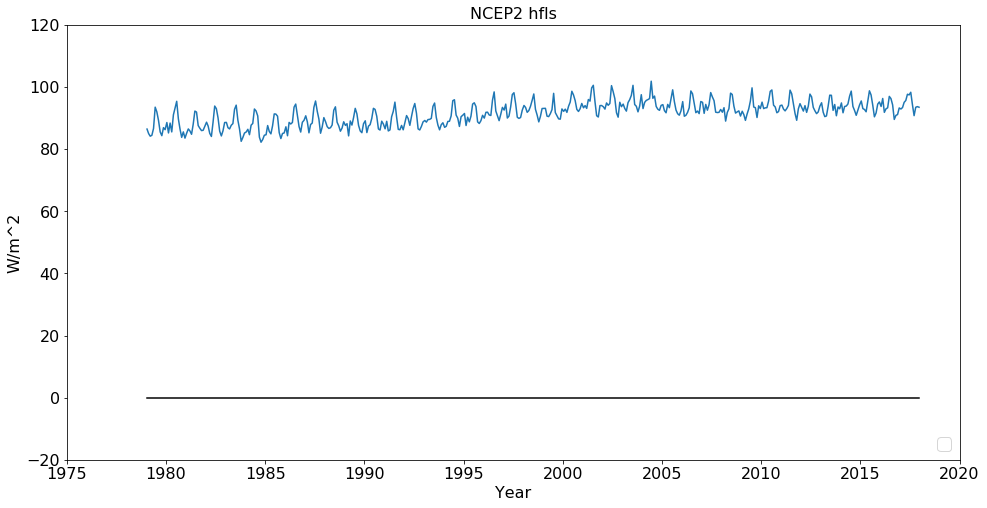

ifil_hfss= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages/shtfl.sfc.mon.mean.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 40 0 475
ncep2_hfss_monthlyclimatology_from_monthly.shape= (12, 94, 192)
ncep2_hfss_monthlyanomaly_from_monthly.shape= (468, 94, 192)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
plot_xy: o

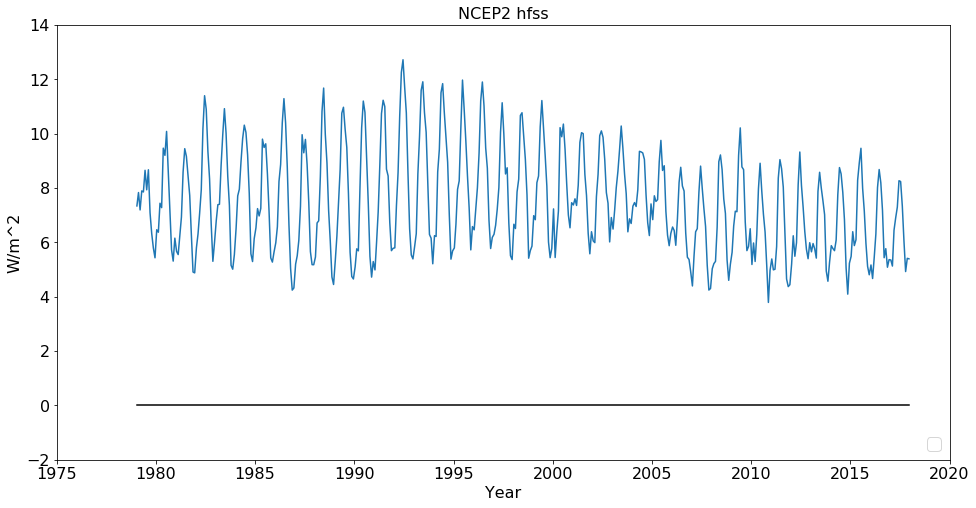

ifil_rlds= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages/dlwrf.sfc.mon.mean.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 40 0 475
ncep2_rlds_monthlyclimatology_from_monthly.shape= (12, 94, 192)
ncep2_rlds_monthlyanomaly_from_monthly.shape= (468, 94, 192)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
plot_xy: o

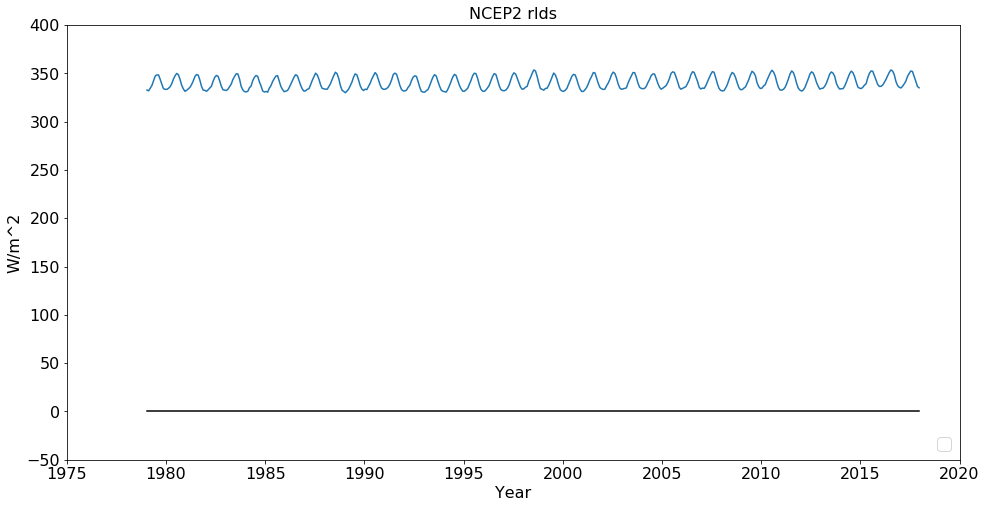

ifil_rlus= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages/ulwrf.sfc.mon.mean.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 40 0 475
ncep2_rlus_monthlyclimatology_from_monthly.shape= (12, 94, 192)
ncep2_rlus_monthlyanomaly_from_monthly.shape= (468, 94, 192)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
plot_xy: o

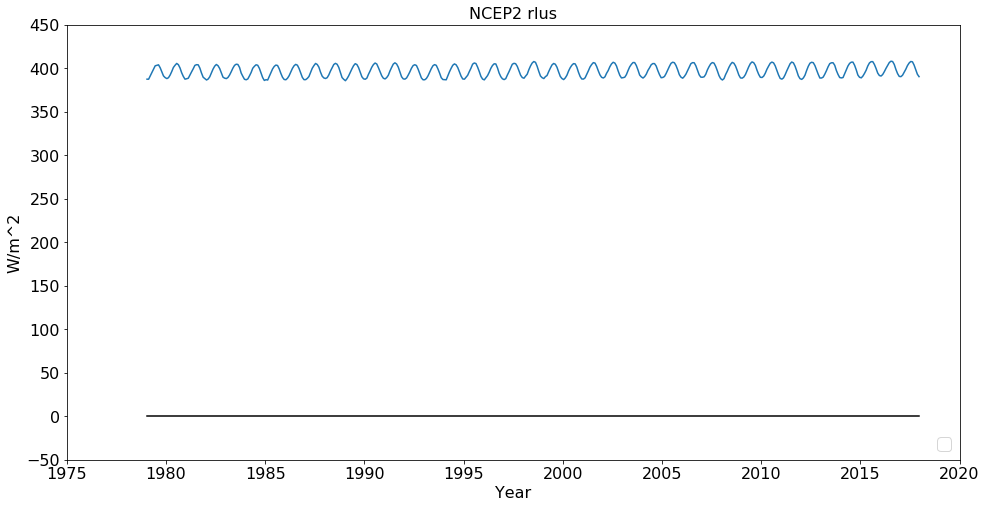

ifil_rlut= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages/ulwrf.ntat.mon.mean.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 40 0 475
ncep2_rlut_monthlyclimatology_from_monthly.shape= (12, 94, 192)
ncep2_rlut_monthlyanomaly_from_monthly.shape= (468, 94, 192)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
plot_xy: 

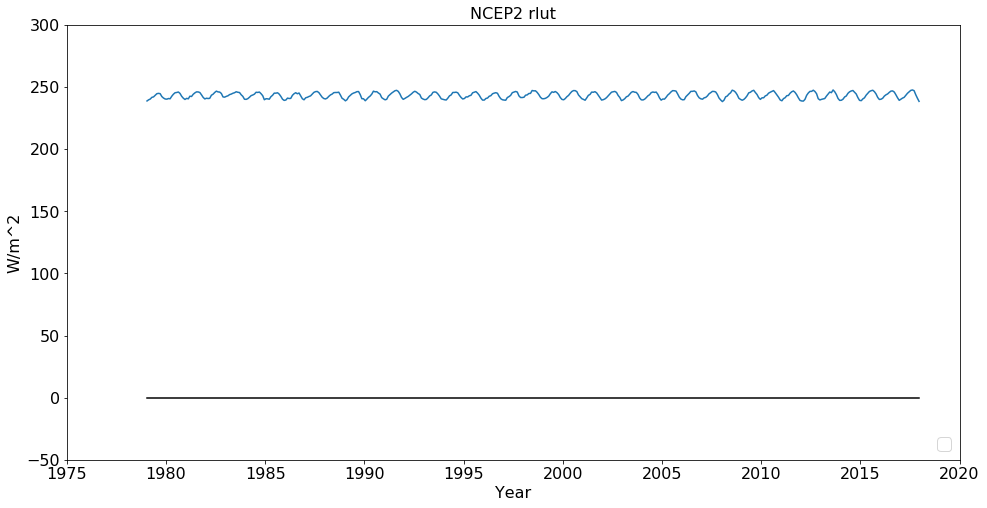

ifil_rsdt= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages/dswrf.ntat.mon.mean.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 40 0 475
ncep2_rsdt_monthlyclimatology_from_monthly.shape= (12, 94, 192)
ncep2_rsdt_monthlyanomaly_from_monthly.shape= (468, 94, 192)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
plot_xy: 

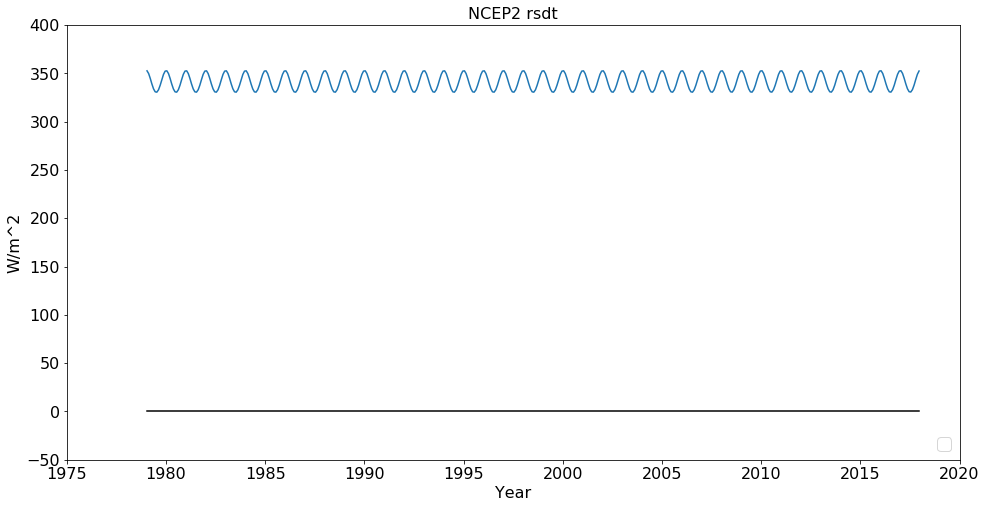

ifil_rsus= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages/uswrf.sfc.mon.mean.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 40 0 475
ncep2_rsus_monthlyclimatology_from_monthly.shape= (12, 94, 192)
ncep2_rsus_monthlyanomaly_from_monthly.shape= (468, 94, 192)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
plot_xy: o

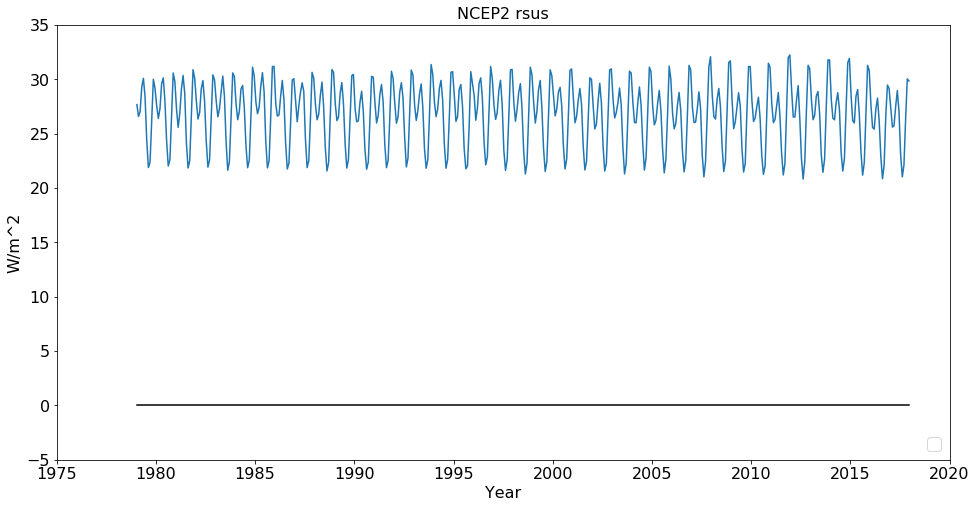

ifil_rsds= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages/dswrf.sfc.mon.mean.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 40 0 475
ncep2_rsds_monthlyclimatology_from_monthly.shape= (12, 94, 192)
ncep2_rsds_monthlyanomaly_from_monthly.shape= (468, 94, 192)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
plot_xy: o

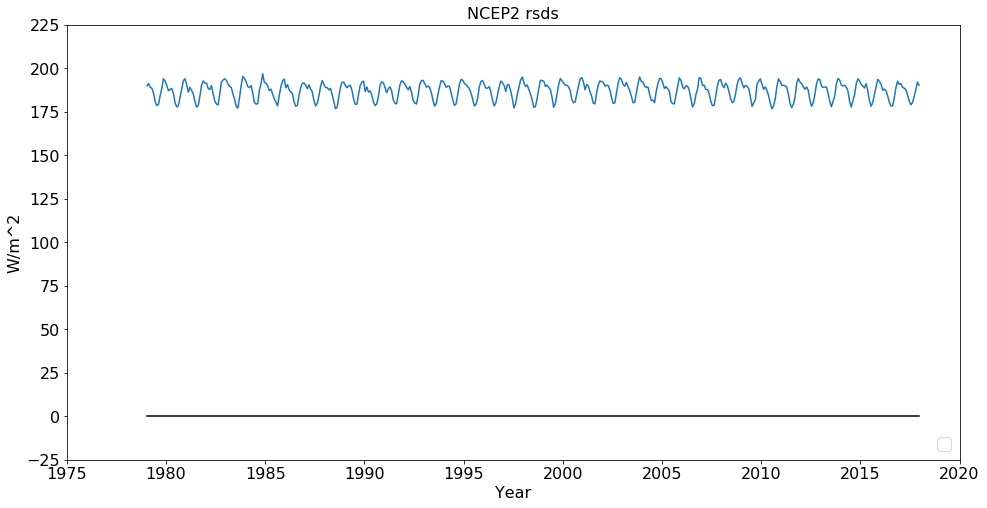

ifil_rsut= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages/uswrf.ntat.mon.mean.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 40 0 475
ncep2_rsut_monthlyclimatology_from_monthly.shape= (12, 94, 192)
ncep2_rsut_monthlyanomaly_from_monthly.shape= (468, 94, 192)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
plot_xy: 

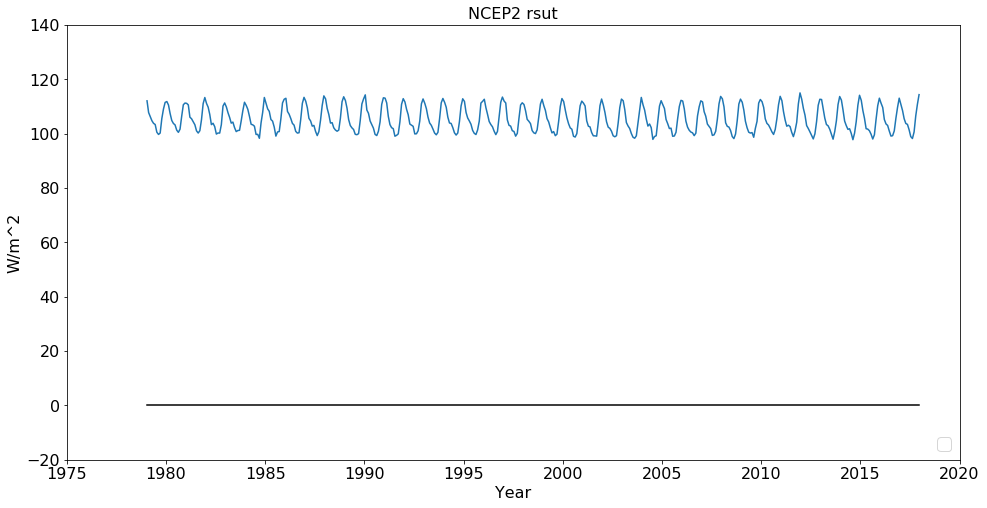

END


In [3]:
print('BEGIN')

ncepr2_calendar='proleptic_gregorian'

topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/monthly_averages'

cbeg=1980 
cend=2000 
abeg=1979
aend=2017

# cbeg=1980 
# cend=1999 
# abeg=1980
# aend=1999
  
################################################################################

AnnOut=False
#AnnOut=True

ZeroClim=False
ZeroClim=True

################################################################################
#lhtfl.sfc

ifil_hfls_tmp=sorted(glob.glob(topdir+'/lhtfl.sfc.mon.mean.nc'))
ifil_hfls=[]
for ifil in ifil_hfls_tmp:
  ifil_hfls.append(ifil)

print('ifil_hfls=',ifil_hfls)

ncep2_monthly_files_hfls=n_data_funcs(input_files=[ifil_hfls], input_var_name='lhtfl')

ncep2_monthly_files_hfls.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_monthly_files_hfls.get_latlon_info(Diag=False)

ncep2_monthly_hfls_from_monthly=ncep2_monthly_files_hfls.calculate_quantity('dummy', quantity='latlon_region')

ncep2_hfls_monthlyclimatology_from_monthly, ncep2_hfls_monthlyanomaly_from_monthly = ncep2_monthly_files_hfls.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_hfls_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_hfls_monthlyclimatology_from_monthly.shape=',ncep2_hfls_monthlyclimatology_from_monthly.shape)
print('ncep2_hfls_monthlyanomaly_from_monthly.shape=',ncep2_hfls_monthlyanomaly_from_monthly.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_hfls_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_hfls.clat),axis=1),), \
  input_xvals=(ncep2_monthly_files_hfls.year_fraction_anomaly,), \
  title='NCEP2 hfls', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
################################################################################
#shtfl.sfc

ifil_hfss_tmp=sorted(glob.glob(topdir+'/shtfl.sfc.mon.mean.nc'))
ifil_hfss=[]
for ifil in ifil_hfss_tmp:
  ifil_hfss.append(ifil)

print('ifil_hfss=',ifil_hfss)

ncep2_monthly_files_hfss=n_data_funcs(input_files=[ifil_hfss], input_var_name='shtfl')

ncep2_monthly_files_hfss.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_monthly_files_hfss.get_latlon_info(Diag=False)

ncep2_monthly_hfss_from_monthly=ncep2_monthly_files_hfss.calculate_quantity('dummy', quantity='latlon_region')

ncep2_hfss_monthlyclimatology_from_monthly, ncep2_hfss_monthlyanomaly_from_monthly = ncep2_monthly_files_hfss.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_hfss_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_hfss_monthlyclimatology_from_monthly.shape=',ncep2_hfss_monthlyclimatology_from_monthly.shape)
print('ncep2_hfss_monthlyanomaly_from_monthly.shape=',ncep2_hfss_monthlyanomaly_from_monthly.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_hfss_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_hfss.clat),axis=1),), \
  input_xvals=(ncep2_monthly_files_hfss.year_fraction_anomaly,), \
  title='NCEP2 hfss', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#dlwrf.sfc

ifil_rlds_tmp=sorted(glob.glob(topdir+'/dlwrf.sfc.mon.mean.nc'))
ifil_rlds=[]
for ifil in ifil_rlds_tmp:
  ifil_rlds.append(ifil)

print('ifil_rlds=',ifil_rlds)

ncep2_monthly_files_rlds=n_data_funcs(input_files=[ifil_rlds], input_var_name='dlwrf')

ncep2_monthly_files_rlds.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_monthly_files_rlds.get_latlon_info(Diag=False)

ncep2_monthly_rlds_from_monthly=ncep2_monthly_files_rlds.calculate_quantity('dummy', quantity='latlon_region')

ncep2_rlds_monthlyclimatology_from_monthly, ncep2_rlds_monthlyanomaly_from_monthly = ncep2_monthly_files_rlds.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rlds_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rlds_monthlyclimatology_from_monthly.shape=',ncep2_rlds_monthlyclimatology_from_monthly.shape)
print('ncep2_rlds_monthlyanomaly_from_monthly.shape=',ncep2_rlds_monthlyanomaly_from_monthly.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rlds_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rlds.clat),axis=1),), \
  input_xvals=(ncep2_monthly_files_rlds.year_fraction_anomaly,), \
  title='NCEP2 rlds', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#ulwrf.sfc

ifil_rlus_tmp=sorted(glob.glob(topdir+'/ulwrf.sfc.mon.mean.nc'))
ifil_rlus=[]
for ifil in ifil_rlus_tmp:
  ifil_rlus.append(ifil)

print('ifil_rlus=',ifil_rlus)

ncep2_monthly_files_rlus=n_data_funcs(input_files=[ifil_rlus], input_var_name='ulwrf')

ncep2_monthly_files_rlus.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_monthly_files_rlus.get_latlon_info(Diag=False)

ncep2_monthly_rlus_from_monthly=ncep2_monthly_files_rlus.calculate_quantity('dummy', quantity='latlon_region')

ncep2_rlus_monthlyclimatology_from_monthly, ncep2_rlus_monthlyanomaly_from_monthly = ncep2_monthly_files_rlus.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rlus_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rlus_monthlyclimatology_from_monthly.shape=',ncep2_rlus_monthlyclimatology_from_monthly.shape)
print('ncep2_rlus_monthlyanomaly_from_monthly.shape=',ncep2_rlus_monthlyanomaly_from_monthly.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rlus_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rlus.clat),axis=1),), \
  input_xvals=(ncep2_monthly_files_rlus.year_fraction_anomaly,), \
  title='NCEP2 rlus', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#ulwrf.ntat

ifil_rlut_tmp=sorted(glob.glob(topdir+'/ulwrf.ntat.mon.mean.nc'))
ifil_rlut=[]
for ifil in ifil_rlut_tmp:
  ifil_rlut.append(ifil)

print('ifil_rlut=',ifil_rlut)

ncep2_monthly_files_rlut=n_data_funcs(input_files=[ifil_rlut], input_var_name='ulwrf')

ncep2_monthly_files_rlut.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_monthly_files_rlut.get_latlon_info(Diag=False)

ncep2_monthly_rlut_from_monthly=ncep2_monthly_files_rlut.calculate_quantity('dummy', quantity='latlon_region')

ncep2_rlut_monthlyclimatology_from_monthly, ncep2_rlut_monthlyanomaly_from_monthly = ncep2_monthly_files_rlut.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rlut_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rlut_monthlyclimatology_from_monthly.shape=',ncep2_rlut_monthlyclimatology_from_monthly.shape)
print('ncep2_rlut_monthlyanomaly_from_monthly.shape=',ncep2_rlut_monthlyanomaly_from_monthly.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rlut_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rlut.clat),axis=1),), \
  input_xvals=(ncep2_monthly_files_rlut.year_fraction_anomaly,), \
  title='NCEP2 rlut', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#dswrf.ntat

ifil_rsdt_tmp=sorted(glob.glob(topdir+'/dswrf.ntat.mon.mean.nc'))
ifil_rsdt=[]
for ifil in ifil_rsdt_tmp:
  ifil_rsdt.append(ifil)

print('ifil_rsdt=',ifil_rsdt)

ncep2_monthly_files_rsdt=n_data_funcs(input_files=[ifil_rsdt], input_var_name='dswrf')

ncep2_monthly_files_rsdt.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_monthly_files_rsdt.get_latlon_info(Diag=False)

ncep2_monthly_rsdt_from_monthly=ncep2_monthly_files_rsdt.calculate_quantity('dummy', quantity='latlon_region')

ncep2_rsdt_monthlyclimatology_from_monthly, ncep2_rsdt_monthlyanomaly_from_monthly = ncep2_monthly_files_rsdt.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rsdt_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rsdt_monthlyclimatology_from_monthly.shape=',ncep2_rsdt_monthlyclimatology_from_monthly.shape)
print('ncep2_rsdt_monthlyanomaly_from_monthly.shape=',ncep2_rsdt_monthlyanomaly_from_monthly.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rsdt_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsdt.clat),axis=1),), \
  input_xvals=(ncep2_monthly_files_rsdt.year_fraction_anomaly,), \
  title='NCEP2 rsdt', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#uswrf.sfc

ifil_rsus_tmp=sorted(glob.glob(topdir+'/uswrf.sfc.mon.mean.nc'))
ifil_rsus=[]
for ifil in ifil_rsus_tmp:
  ifil_rsus.append(ifil)

print('ifil_rsus=',ifil_rsus)

ncep2_monthly_files_rsus=n_data_funcs(input_files=[ifil_rsus], input_var_name='uswrf')

ncep2_monthly_files_rsus.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_monthly_files_rsus.get_latlon_info(Diag=False)

ncep2_monthly_rsus_from_monthly=ncep2_monthly_files_rsus.calculate_quantity('dummy', quantity='latlon_region')

ncep2_rsus_monthlyclimatology_from_monthly, ncep2_rsus_monthlyanomaly_from_monthly = ncep2_monthly_files_rsus.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rsus_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rsus_monthlyclimatology_from_monthly.shape=',ncep2_rsus_monthlyclimatology_from_monthly.shape)
print('ncep2_rsus_monthlyanomaly_from_monthly.shape=',ncep2_rsus_monthlyanomaly_from_monthly.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rsus_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsus.clat),axis=1),), \
  input_xvals=(ncep2_monthly_files_rsus.year_fraction_anomaly,), \
  title='NCEP2 rsus', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#dswrf.sfc

ifil_rsds_tmp=sorted(glob.glob(topdir+'/dswrf.sfc.mon.mean.nc'))
ifil_rsds=[]
for ifil in ifil_rsds_tmp:
  ifil_rsds.append(ifil)

print('ifil_rsds=',ifil_rsds)

ncep2_monthly_files_rsds=n_data_funcs(input_files=[ifil_rsds], input_var_name='dswrf')

ncep2_monthly_files_rsds.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_monthly_files_rsds.get_latlon_info(Diag=False)

ncep2_monthly_rsds_from_monthly=ncep2_monthly_files_rsds.calculate_quantity('dummy', quantity='latlon_region')

ncep2_rsds_monthlyclimatology_from_monthly, ncep2_rsds_monthlyanomaly_from_monthly = ncep2_monthly_files_rsds.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rsds_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rsds_monthlyclimatology_from_monthly.shape=',ncep2_rsds_monthlyclimatology_from_monthly.shape)
print('ncep2_rsds_monthlyanomaly_from_monthly.shape=',ncep2_rsds_monthlyanomaly_from_monthly.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rsds_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsds.clat),axis=1),), \
  input_xvals=(ncep2_monthly_files_rsds.year_fraction_anomaly,), \
  title='NCEP2 rsds', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#uswrf.ntat

ifil_rsut_tmp=sorted(glob.glob(topdir+'/uswrf.ntat.mon.mean.nc'))
ifil_rsut=[]
for ifil in ifil_rsut_tmp:
  ifil_rsut.append(ifil)

print('ifil_rsut=',ifil_rsut)

ncep2_monthly_files_rsut=n_data_funcs(input_files=[ifil_rsut], input_var_name='uswrf')

ncep2_monthly_files_rsut.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_monthly_files_rsut.get_latlon_info(Diag=False)

ncep2_monthly_rsut_from_monthly=ncep2_monthly_files_rsut.calculate_quantity('dummy', quantity='latlon_region')

ncep2_rsut_monthlyclimatology_from_monthly, ncep2_rsut_monthlyanomaly_from_monthly = ncep2_monthly_files_rsut.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rsut_from_monthly, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rsut_monthlyclimatology_from_monthly.shape=',ncep2_rsut_monthlyclimatology_from_monthly.shape)
print('ncep2_rsut_monthlyanomaly_from_monthly.shape=',ncep2_rsut_monthlyanomaly_from_monthly.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rsut_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsut.clat),axis=1),), \
  input_xvals=(ncep2_monthly_files_rsut.year_fraction_anomaly,), \
  title='NCEP2 rsut', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################

print('END')

BEGIN
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
series= 2
series= 3
series= 4
series= 5
series= 6
series= 7
series= 8
plot_xy: series,xval_min,max= 8 1979.042349726776 2017.954918032787
plot_xy: series,yval_min,max= 8 3.7899865675778606 408.271165425233
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7ff0a63ae8d0>, <matplotlib.lines.Line2D object at 0x7ff0a63aee10>, <matplotlib.lines.Line2D object at 0x7ff0a63bb2b0>, <matplotlib.lines.Line2D object at 0x7ff0a63bb710>, <matplotlib.lines.Line2D object at 0x7ff0a63bbbe0>, <matplotlib.lines.Line2D object at 0x7ff0a63c3048>, <matplotlib.lines.Line2D object at 0x7ff0a63c34e0>, <matplotlib.lines.Line2D object at 0x7ff0a63c3940>, <matplotlib.lines.Line2D object at 0x7ff0a63c

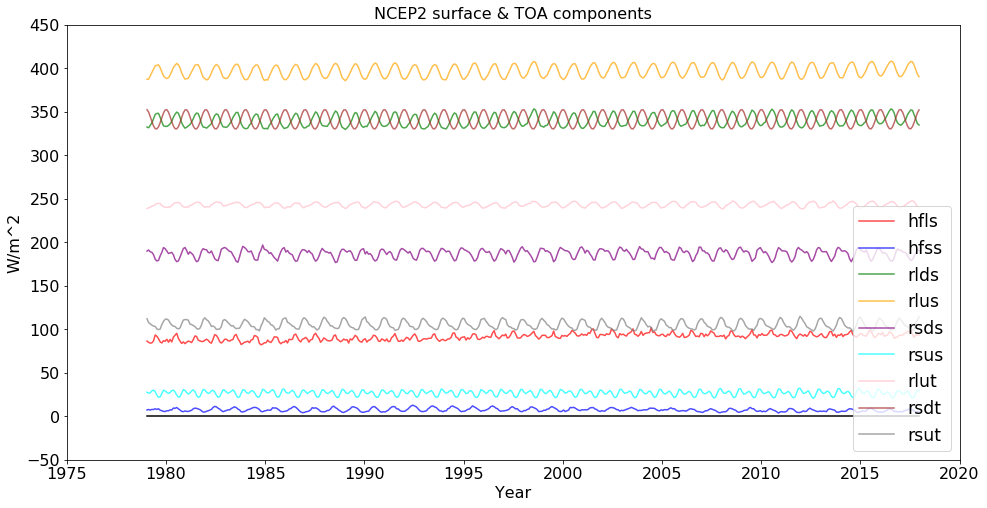

plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
series= 2
series= 3
plot_xy: series,xval_min,max= 3 1979.042349726776 2017.954918032787
plot_xy: series,yval_min,max= 3 -17.952537720866175 352.58615886661823
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7ff0a6354d68>, <matplotlib.lines.Line2D object at 0x7ff0a62df2e8>, <matplotlib.lines.Line2D object at 0x7ff0a62df780>, <matplotlib.lines.Line2D object at 0x7ff0a62dfbe0>]
plot_xy: newlabels= ['rlut', 'rsdt', 'rsut', 'net down toa']


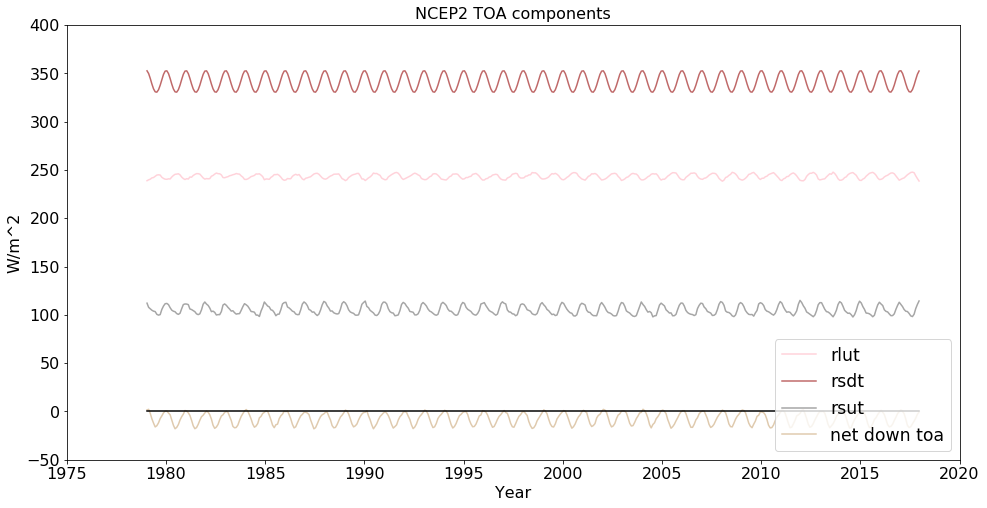

plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
series= 2
series= 3
series= 4
series= 5
series= 6
plot_xy: series,xval_min,max= 6 1979.042349726776 2017.954918032787
plot_xy: series,yval_min,max= 6 -13.834459684885639 408.271165425233
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7ff0a62fff60>, <matplotlib.lines.Line2D object at 0x7ff0a62f0e10>, <matplotlib.lines.Line2D object at 0x7ff0a62f00f0>, <matplotlib.lines.Line2D object at 0x7ff0a62f0e80>, <matplotlib.lines.Line2D object at 0x7ff0a629c198>, <matplotlib.lines.Line2D object at 0x7ff0a629c908>, <matplotlib.lines.Line2D object at 0x7ff0a629ccf8>]
plot_xy: newlabels= ['hfls', 'hfss', 'rlds', 'rlus', 'rsds', 'rsus', 'net down surf']


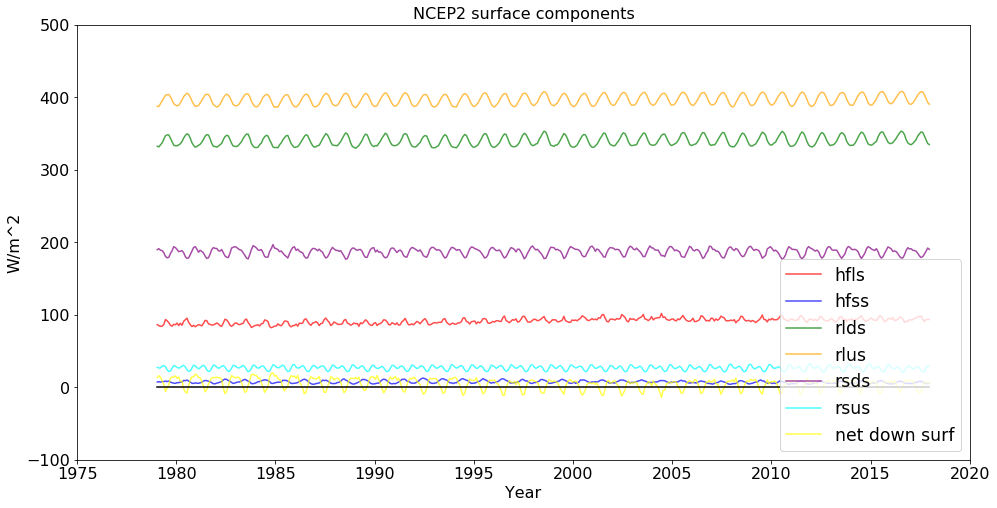

plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
plot_xy: series,xval_min,max= 1 1979.042349726776 2017.954918032787
plot_xy: series,yval_min,max= 1 -17.952537720866175 19.754201646627134
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7ff0a63e6a20>, <matplotlib.lines.Line2D object at 0x7ff0a63e6080>]
plot_xy: newlabels= ['net down surf', 'net down toa']


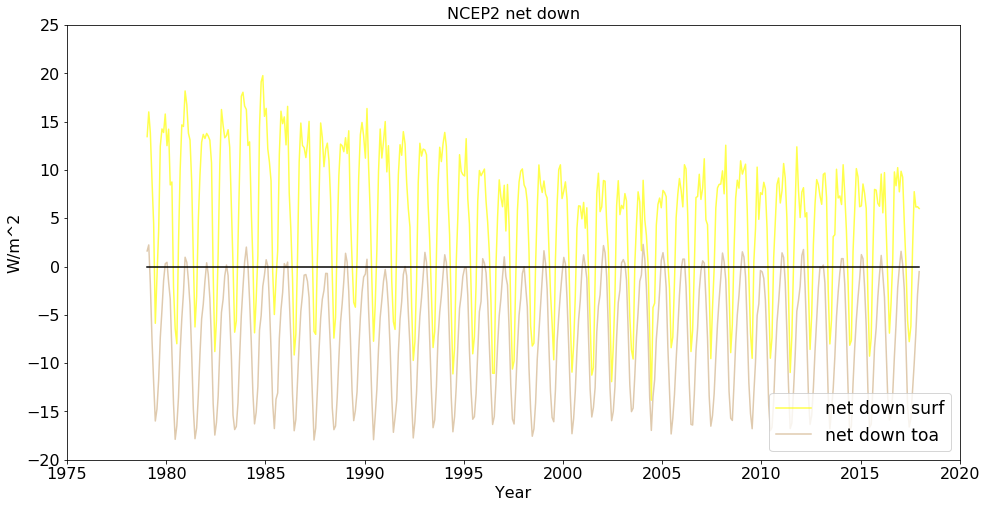

END


In [4]:
print('BEGIN')

################################################################################
#all components
  
input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['hfls','hfss','rlds','rlus','rsds','rsus','rlut','rsdt','rsut']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  
  if(flux=='hfls'):
    input_datas = input_datas + (np.average(np.average(ncep2_hfls_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_hfls.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_hfls.year_fraction_anomaly,)

  elif(flux=='hfss'):
    input_datas = input_datas + (np.average(np.average(ncep2_hfss_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_hfss.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_hfss.year_fraction_anomaly,)

  elif(flux=='rlds'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlds_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rlds.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rlds.year_fraction_anomaly,)

  elif(flux=='rlus'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlus_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rlus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rlus.year_fraction_anomaly,)

  elif(flux=='rlut'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlut_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rlut.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rlut.year_fraction_anomaly,)

  elif(flux=='rsdt'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsdt_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsdt.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsdt.year_fraction_anomaly,)

  elif(flux=='rsus'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsus_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsus.year_fraction_anomaly,)

  elif(flux=='rsds'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsds_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsds.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsds.year_fraction_anomaly,)

  elif(flux=='rsut'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsut_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsut.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsut.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))

plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
  title='NCEP2 surface & TOA components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#top of atmosphere components

ncep2_netdowntoa_monthlyanomaly = \
  ncep2_rsdt_monthlyanomaly_from_monthly - \
  ncep2_rsut_monthlyanomaly_from_monthly - \
  ncep2_rlut_monthlyanomaly_from_monthly

input_datas = ()
input_xvals = ()
  
line_colors,line_labels=[],[]
for flux in ['rlut','rsdt','rsut','net down toa']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  
  if(flux=='rlut'):
    input_datas = (np.average(np.average(ncep2_rlut_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rlut.clat),axis=1),)
    input_xvals = (ncep2_monthly_files_rlut.year_fraction_anomaly,)

  elif(flux=='rsdt'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsdt_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsdt.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsdt.year_fraction_anomaly,)

  elif(flux=='rsut'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsut_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsut.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsut.year_fraction_anomaly,)

  elif(flux=='net down toa'):
    input_datas = input_datas + (np.average(np.average(ncep2_netdowntoa_monthlyanomaly,axis=1,weights=ncep2_monthly_files_rsut.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsut.year_fraction_anomaly,)
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True, 
  input_data=input_datas, \
  input_xvals=input_xvals, \
  title='NCEP2 TOA components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#surface components

ncep2_netdownsurf_monthlyanomaly = \
  ncep2_rlds_monthlyanomaly_from_monthly + \
  ncep2_rsds_monthlyanomaly_from_monthly - \
  ncep2_rlus_monthlyanomaly_from_monthly - \
  ncep2_rsus_monthlyanomaly_from_monthly - \
  ncep2_hfls_monthlyanomaly_from_monthly - \
  ncep2_hfss_monthlyanomaly_from_monthly

input_datas = ()
input_xvals = ()


line_colors,line_labels=[],[]
for flux in ['hfls','hfss','rlds','rlus','rsds','rsus','net down surf']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  if(flux=='hfls'):
    input_datas = (np.average(np.average(ncep2_hfls_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_hfls.clat),axis=1),)
    input_xvals = (ncep2_monthly_files_hfls.year_fraction_anomaly,)
    
  elif(flux=='hfss'):
    input_datas = input_datas + (np.average(np.average(ncep2_hfss_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_hfss.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_hfss.year_fraction_anomaly,)
    
  elif(flux=='rlds'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlds_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rlds.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rlds.year_fraction_anomaly,)
    
  elif(flux=='rlus'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlus_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rlus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rlus.year_fraction_anomaly,)
    
  elif(flux=='rsds'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsds_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsds.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsds.year_fraction_anomaly,)
    
  elif(flux=='rsus'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsus_monthlyanomaly_from_monthly,axis=1,weights=ncep2_monthly_files_rsus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsus.year_fraction_anomaly,)

  elif(flux=='net down surf'):
    input_datas = input_datas + (np.average(np.average(ncep2_netdownsurf_monthlyanomaly,axis=1,weights=ncep2_monthly_files_rsus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsus.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True,\
  input_data=input_datas, \
  input_xvals=input_xvals, \
  title='NCEP2 surface components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

################################################################################

input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['net down surf','net down toa']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)

  if(flux=='net down surf'):
    input_datas = (np.average(np.average(ncep2_netdownsurf_monthlyanomaly,axis=1,weights=ncep2_monthly_files_rsut.clat[:]),axis=1),)
    input_xvals = (ncep2_monthly_files_rsut.year_fraction_anomaly,)
    
  elif(flux=='net down toa'):
    input_datas = input_datas + (np.average(np.average(ncep2_netdowntoa_monthlyanomaly,axis=1,weights=ncep2_monthly_files_rsut.clat[:]),axis=1),)
    input_xvals = input_xvals + (ncep2_monthly_files_rsut.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
  title='NCEP2 net down', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

################################################################################

print('END')

BEGIN
ifil_hfls= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/lhtfl.sfc.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/shor

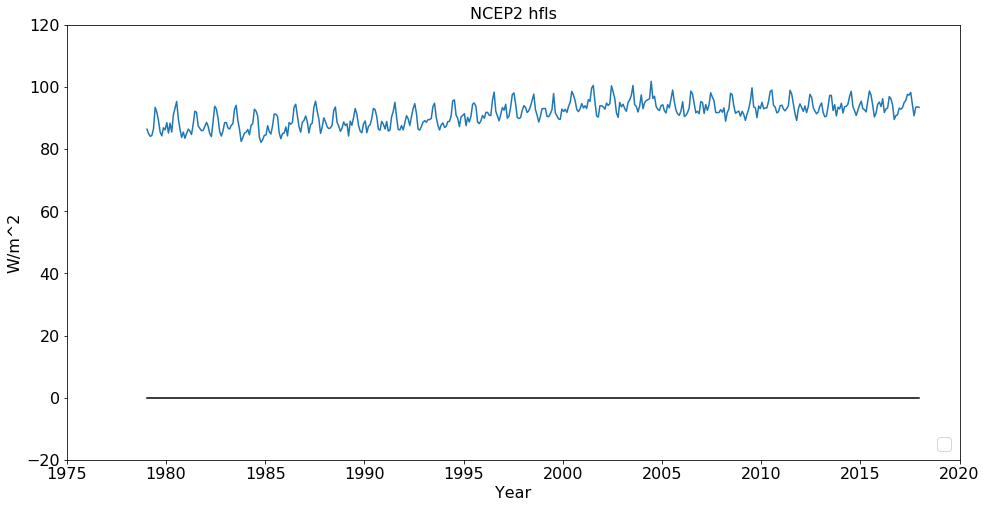

ifil_hfss= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/shtfl.sfc.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/

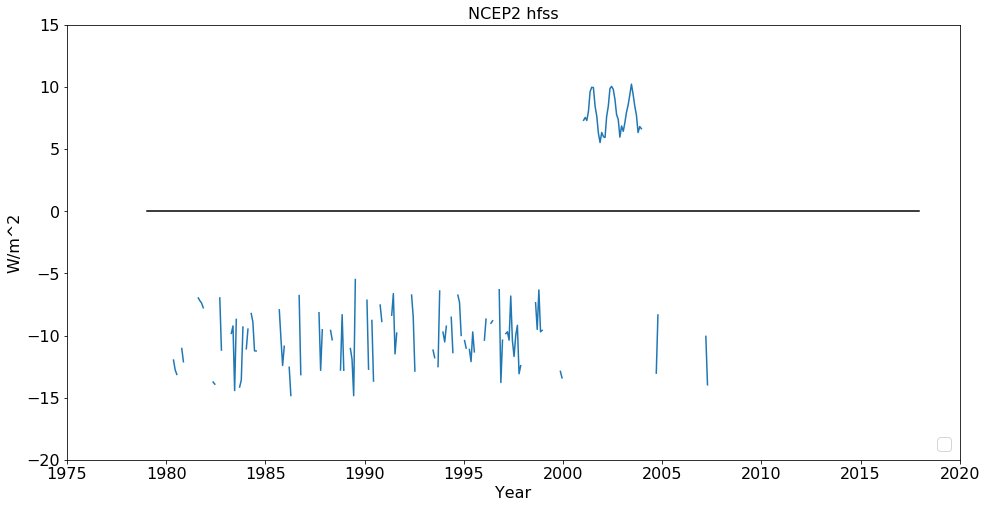

ifil_rlds= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dlwrf.sfc.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/

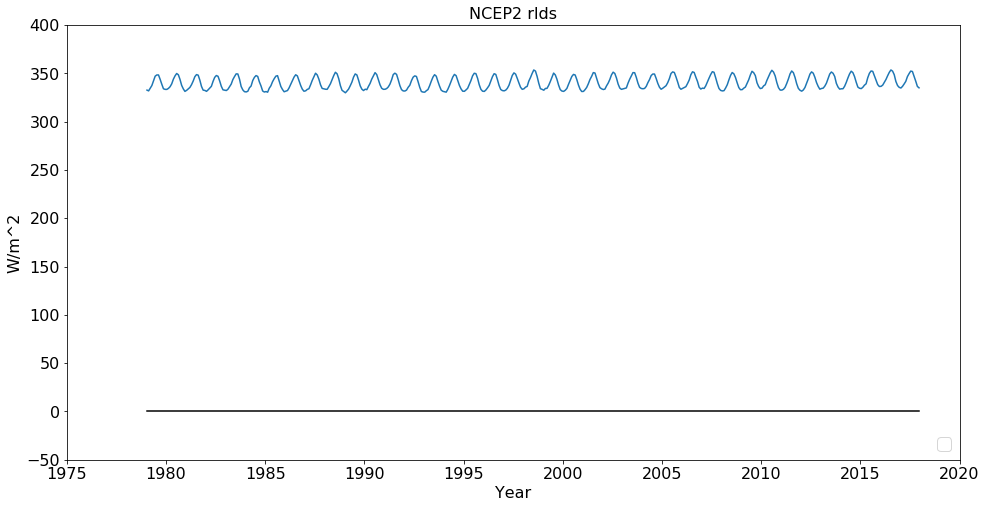

ifil_rlus= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.sfc.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/

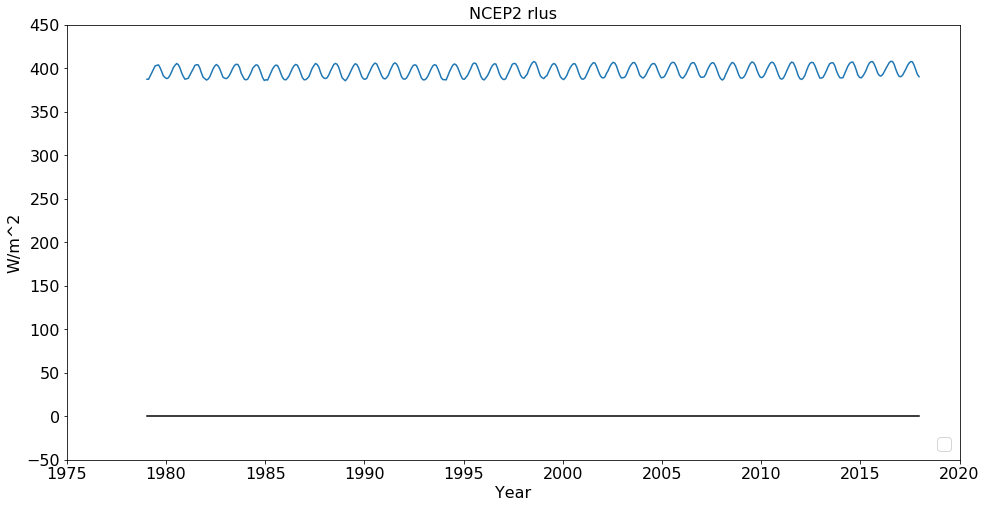

ifil_rlut= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/ulwrf.ntat.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEP

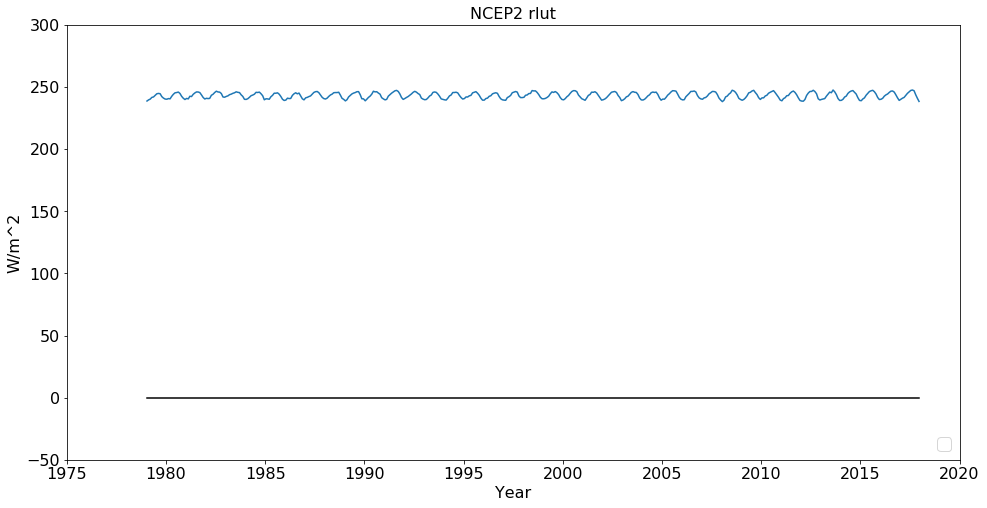

ifil_rsdt= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.ntat.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEP

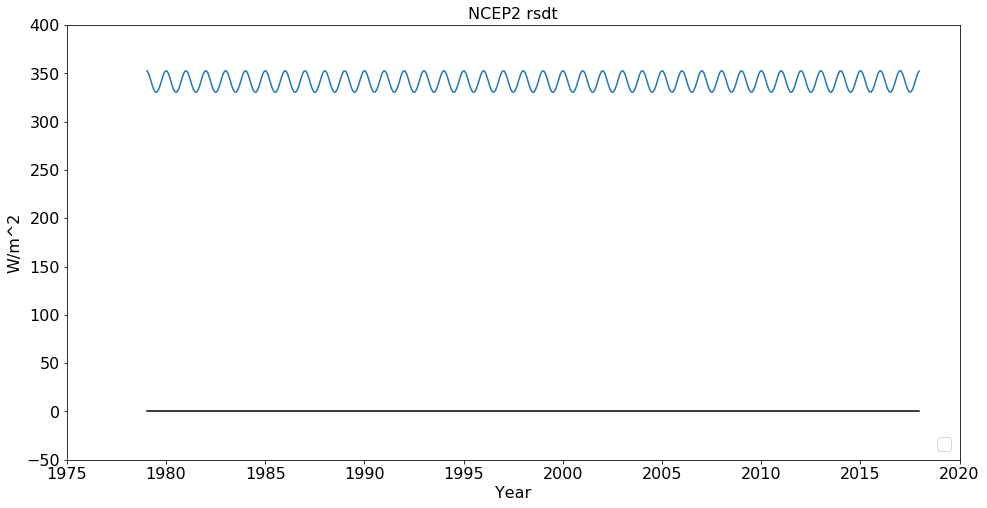

ifil_rsus= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.sfc.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/

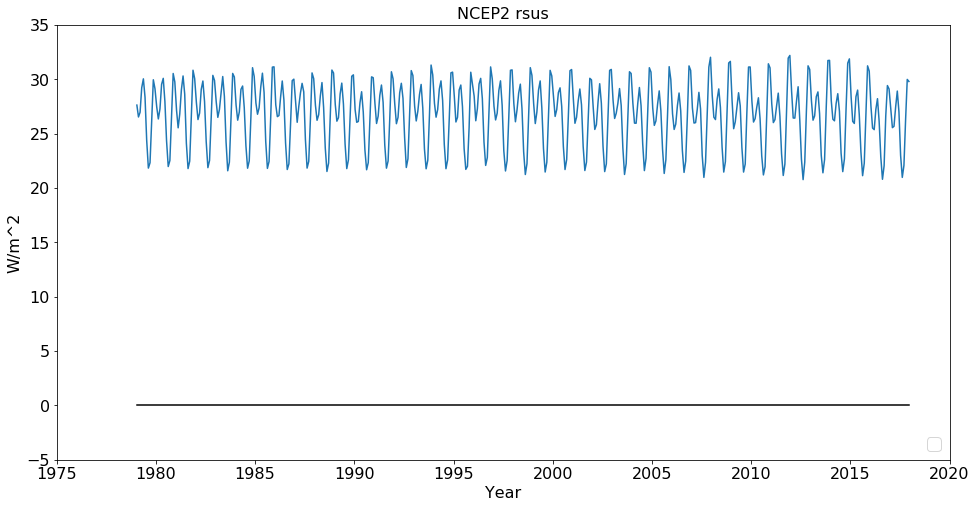

ifil_rsds= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/dswrf.sfc.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/

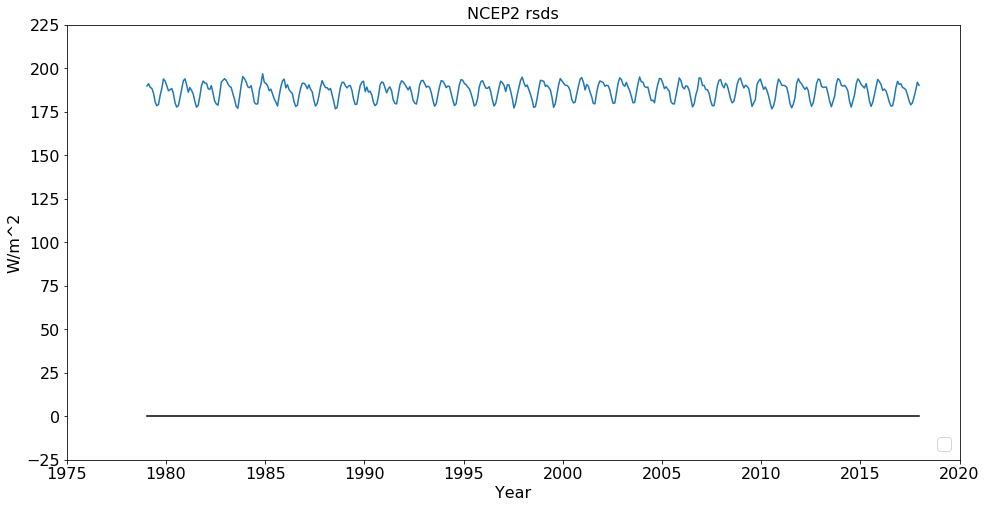

ifil_rsut= ['/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1979.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1980.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1981.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1982.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1983.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1984.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1985.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1986.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1987.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1988.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1989.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/uswrf.ntat.gauss.1990.nc', '/OSM/CBR/OA_DCFP/data/CAFEP

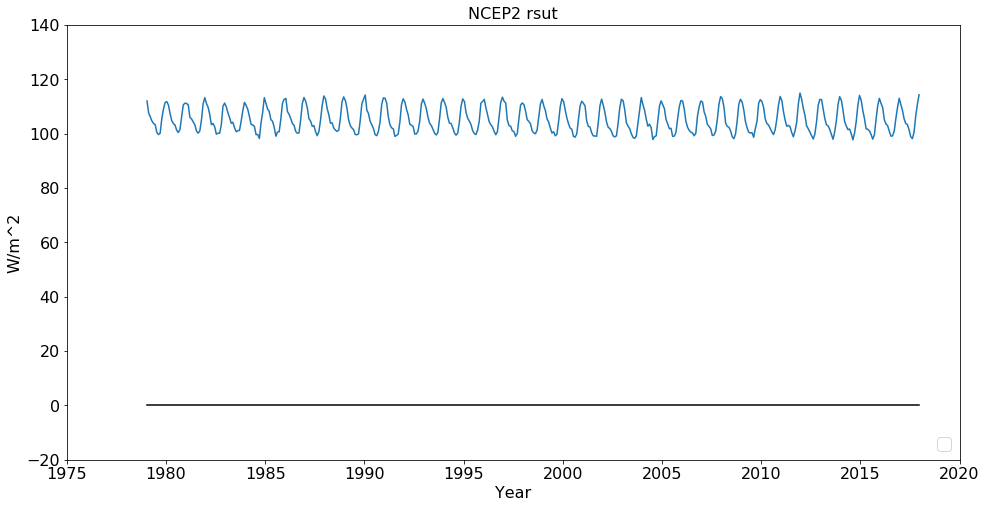

END


In [44]:
print('BEGIN')

ncepr2_calendar='proleptic_gregorian'

topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/ncep2/daily_averages'

cbeg=1980 
cend=2000 
abeg=1979
aend=2017

# cbeg=1980 
# cend=1999 
# abeg=1980
# aend=1999
  
################################################################################

AnnOut=False
#AnnOut=True

ZeroClim=False
ZeroClim=True

#fuck
  
#sfc: lhtfl, uswrf, ulwrf, dlwrf, dswrf toa: uswrf, ulwrf, dswrf, uswrf, ok => only shtfl bad

################################################################################
#lhtfl.sfc

ifil_hfls_tmp=sorted(glob.glob(topdir+'/lhtfl.sfc.gauss.????.nc'))
ifil_hfls=[]
for ifil in ifil_hfls_tmp:
  ifil_hfls.append(ifil)

print('ifil_hfls=',ifil_hfls)

ncep2_daily_files_hfls=n_data_funcs(input_files=[ifil_hfls], input_var_name='lhtfl')

ncep2_daily_files_hfls.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_daily_files_hfls.get_latlon_info(Diag=False)

ncep2_daily_hfls=ncep2_daily_files_hfls.calculate_quantity('dummy', quantity='latlon_region')

ncep2_daily_files_hfls.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.

ncep2_monthly_hfls_from_daily = ncep2_daily_files_hfls.daily_to_monthly(EndOption=1, input=ncep2_daily_hfls)

ncep2_hfls_monthlyclimatology_from_daily, ncep2_hfls_monthlyanomaly_from_daily = ncep2_daily_files_hfls.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_hfls_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_hfls_monthlyclimatology_from_daily.shape=',ncep2_hfls_monthlyclimatology_from_daily.shape)
print('ncep2_hfls_monthlyanomaly_from_daily.shape=',ncep2_hfls_monthlyanomaly_from_daily.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_hfls_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_hfls.clat),axis=1),), \
  input_xvals=(ncep2_daily_files_hfls.year_fraction_anomaly,), \
  title='NCEP2 hfls', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
################################################################################
#shtfl.sfc

ifil_hfss_tmp=sorted(glob.glob(topdir+'/shtfl.sfc.gauss.????.nc'))
ifil_hfss=[]
for ifil in ifil_hfss_tmp:
  ifil_hfss.append(ifil)

print('ifil_hfss=',ifil_hfss)

ncep2_daily_files_hfss=n_data_funcs(input_files=[ifil_hfss], input_var_name='shtfl')

ncep2_daily_files_hfss.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_daily_files_hfss.get_latlon_info(Diag=False)

ncep2_daily_hfss=ncep2_daily_files_hfss.calculate_quantity('dummy', quantity='latlon_region')

ncep2_daily_files_hfss.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.

ncep2_monthly_hfss_from_daily = ncep2_daily_files_hfss.daily_to_monthly(EndOption=1, input=ncep2_daily_hfss)

ncep2_hfss_monthlyclimatology_from_daily, ncep2_hfss_monthlyanomaly_from_daily = ncep2_daily_files_hfss.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_hfss_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_hfss_monthlyclimatology_from_daily.shape=',ncep2_hfss_monthlyclimatology_from_daily.shape)
print('ncep2_hfss_monthlyanomaly_from_daily.shape=',ncep2_hfss_monthlyanomaly_from_daily.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_hfss_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_hfss.clat),axis=1),), \
  input_xvals=(ncep2_daily_files_hfss.year_fraction_anomaly,), \
  title='NCEP2 hfss', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#dlwrf.sfc

ifil_rlds_tmp=sorted(glob.glob(topdir+'/dlwrf.sfc.gauss.????.nc'))
ifil_rlds=[]
for ifil in ifil_rlds_tmp:
  ifil_rlds.append(ifil)

print('ifil_rlds=',ifil_rlds)

ncep2_daily_files_rlds=n_data_funcs(input_files=[ifil_rlds], input_var_name='dlwrf')

ncep2_daily_files_rlds.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_daily_files_rlds.get_latlon_info(Diag=False)

ncep2_daily_rlds=ncep2_daily_files_rlds.calculate_quantity('dummy', quantity='latlon_region')

ncep2_daily_files_rlds.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.

ncep2_monthly_rlds_from_daily = ncep2_daily_files_rlds.daily_to_monthly(EndOption=1, input=ncep2_daily_rlds)

ncep2_rlds_monthlyclimatology_from_daily, ncep2_rlds_monthlyanomaly_from_daily = ncep2_daily_files_rlds.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rlds_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rlds_monthlyclimatology_from_daily.shape=',ncep2_rlds_monthlyclimatology_from_daily.shape)
print('ncep2_rlds_monthlyanomaly_from_daily.shape=',ncep2_rlds_monthlyanomaly_from_daily.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rlds_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rlds.clat),axis=1),), \
  input_xvals=(ncep2_daily_files_rlds.year_fraction_anomaly,), \
  title='NCEP2 rlds', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#ulwrf.sfc

ifil_rlus_tmp=sorted(glob.glob(topdir+'/ulwrf.sfc.gauss.????.nc'))
ifil_rlus=[]
for ifil in ifil_rlus_tmp:
  ifil_rlus.append(ifil)

print('ifil_rlus=',ifil_rlus)

ncep2_daily_files_rlus=n_data_funcs(input_files=[ifil_rlus], input_var_name='ulwrf')

ncep2_daily_files_rlus.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_daily_files_rlus.get_latlon_info(Diag=False)

ncep2_daily_rlus=ncep2_daily_files_rlus.calculate_quantity('dummy', quantity='latlon_region')

ncep2_daily_files_rlus.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.

ncep2_monthly_rlus_from_daily = ncep2_daily_files_rlus.daily_to_monthly(EndOption=1, input=ncep2_daily_rlus)

ncep2_rlus_monthlyclimatology_from_daily, ncep2_rlus_monthlyanomaly_from_daily = ncep2_daily_files_rlus.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rlus_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rlus_monthlyclimatology_from_daily.shape=',ncep2_rlus_monthlyclimatology_from_daily.shape)
print('ncep2_rlus_monthlyanomaly_from_daily.shape=',ncep2_rlus_monthlyanomaly_from_daily.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rlus_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rlus.clat),axis=1),), \
  input_xvals=(ncep2_daily_files_rlus.year_fraction_anomaly,), \
  title='NCEP2 rlus', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#ulwrf.ntat

ifil_rlut_tmp=sorted(glob.glob(topdir+'/ulwrf.ntat.gauss.????.nc'))
ifil_rlut=[]
for ifil in ifil_rlut_tmp:
  ifil_rlut.append(ifil)

print('ifil_rlut=',ifil_rlut)

ncep2_daily_files_rlut=n_data_funcs(input_files=[ifil_rlut], input_var_name='ulwrf')

ncep2_daily_files_rlut.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_daily_files_rlut.get_latlon_info(Diag=False)

ncep2_daily_rlut=ncep2_daily_files_rlut.calculate_quantity('dummy', quantity='latlon_region')

ncep2_daily_files_rlut.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.

ncep2_monthly_rlut_from_daily = ncep2_daily_files_rlut.daily_to_monthly(EndOption=1, input=ncep2_daily_rlut)

ncep2_rlut_monthlyclimatology_from_daily, ncep2_rlut_monthlyanomaly_from_daily = ncep2_daily_files_rlut.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rlut_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rlut_monthlyclimatology_from_daily.shape=',ncep2_rlut_monthlyclimatology_from_daily.shape)
print('ncep2_rlut_monthlyanomaly_from_daily.shape=',ncep2_rlut_monthlyanomaly_from_daily.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rlut_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rlut.clat),axis=1),), \
  input_xvals=(ncep2_daily_files_rlut.year_fraction_anomaly,), \
  title='NCEP2 rlut', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#dswrf.ntat

ifil_rsdt_tmp=sorted(glob.glob(topdir+'/dswrf.ntat.gauss.????.nc'))
ifil_rsdt=[]
for ifil in ifil_rsdt_tmp:
  ifil_rsdt.append(ifil)

print('ifil_rsdt=',ifil_rsdt)

ncep2_daily_files_rsdt=n_data_funcs(input_files=[ifil_rsdt], input_var_name='dswrf')

ncep2_daily_files_rsdt.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_daily_files_rsdt.get_latlon_info(Diag=False)

ncep2_daily_rsdt=ncep2_daily_files_rsdt.calculate_quantity('dummy', quantity='latlon_region')

ncep2_daily_files_rsdt.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.

ncep2_monthly_rsdt_from_daily = ncep2_daily_files_rsdt.daily_to_monthly(EndOption=1, input=ncep2_daily_rsdt)

ncep2_rsdt_monthlyclimatology_from_daily, ncep2_rsdt_monthlyanomaly_from_daily = ncep2_daily_files_rsdt.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rsdt_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rsdt_monthlyclimatology_from_daily.shape=',ncep2_rsdt_monthlyclimatology_from_daily.shape)
print('ncep2_rsdt_monthlyanomaly_from_daily.shape=',ncep2_rsdt_monthlyanomaly_from_daily.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rsdt_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsdt.clat),axis=1),), \
  input_xvals=(ncep2_daily_files_rsdt.year_fraction_anomaly,), \
  title='NCEP2 rsdt', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#uswrf.sfc

ifil_rsus_tmp=sorted(glob.glob(topdir+'/uswrf.sfc.gauss.????.nc'))
ifil_rsus=[]
for ifil in ifil_rsus_tmp:
  ifil_rsus.append(ifil)

print('ifil_rsus=',ifil_rsus)

ncep2_daily_files_rsus=n_data_funcs(input_files=[ifil_rsus], input_var_name='uswrf')

ncep2_daily_files_rsus.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_daily_files_rsus.get_latlon_info(Diag=False)

ncep2_daily_rsus=ncep2_daily_files_rsus.calculate_quantity('dummy', quantity='latlon_region')

ncep2_daily_files_rsus.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.

ncep2_monthly_rsus_from_daily = ncep2_daily_files_rsus.daily_to_monthly(EndOption=1, input=ncep2_daily_rsus)

ncep2_rsus_monthlyclimatology_from_daily, ncep2_rsus_monthlyanomaly_from_daily = ncep2_daily_files_rsus.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rsus_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rsus_monthlyclimatology_from_daily.shape=',ncep2_rsus_monthlyclimatology_from_daily.shape)
print('ncep2_rsus_monthlyanomaly_from_daily.shape=',ncep2_rsus_monthlyanomaly_from_daily.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rsus_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsus.clat),axis=1),), \
  input_xvals=(ncep2_daily_files_rsus.year_fraction_anomaly,), \
  title='NCEP2 rsus', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#dswrf.sfc

ifil_rsds_tmp=sorted(glob.glob(topdir+'/dswrf.sfc.gauss.????.nc'))
ifil_rsds=[]
for ifil in ifil_rsds_tmp:
  ifil_rsds.append(ifil)

print('ifil_rsds=',ifil_rsds)

ncep2_daily_files_rsds=n_data_funcs(input_files=[ifil_rsds], input_var_name='dswrf')

ncep2_daily_files_rsds.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_daily_files_rsds.get_latlon_info(Diag=False)

ncep2_daily_rsds=ncep2_daily_files_rsds.calculate_quantity('dummy', quantity='latlon_region')

ncep2_daily_files_rsds.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.

ncep2_monthly_rsds_from_daily = ncep2_daily_files_rsds.daily_to_monthly(EndOption=1, input=ncep2_daily_rsds)

ncep2_rsds_monthlyclimatology_from_daily, ncep2_rsds_monthlyanomaly_from_daily = ncep2_daily_files_rsds.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rsds_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rsds_monthlyclimatology_from_daily.shape=',ncep2_rsds_monthlyclimatology_from_daily.shape)
print('ncep2_rsds_monthlyanomaly_from_daily.shape=',ncep2_rsds_monthlyanomaly_from_daily.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rsds_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsds.clat),axis=1),), \
  input_xvals=(ncep2_daily_files_rsds.year_fraction_anomaly,), \
  title='NCEP2 rsds', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################
#uswrf.ntat

ifil_rsut_tmp=sorted(glob.glob(topdir+'/uswrf.ntat.gauss.????.nc'))
ifil_rsut=[]
for ifil in ifil_rsut_tmp:
  ifil_rsut.append(ifil)

print('ifil_rsut=',ifil_rsut)

ncep2_daily_files_rsut=n_data_funcs(input_files=[ifil_rsut], input_var_name='uswrf')

ncep2_daily_files_rsut.calculate_filedatetime_info(calendar=ncepr2_calendar)

ncep2_daily_files_rsut.get_latlon_info(Diag=False)

ncep2_daily_rsut=ncep2_daily_files_rsut.calculate_quantity('dummy', quantity='latlon_region')

ncep2_daily_files_rsut.daily_monthly_indices_info(timesep=24) #would be 1 for daily data and 24 for hourly data.

ncep2_monthly_rsut_from_daily = ncep2_daily_files_rsut.daily_to_monthly(EndOption=1, input=ncep2_daily_rsut)

ncep2_rsut_monthlyclimatology_from_daily, ncep2_rsut_monthlyanomaly_from_daily = ncep2_daily_files_rsut.monthly_clim_anom( \
  Diag=False, input=ncep2_monthly_rsut_from_daily, AnnOut=AnnOut, ZeroClim=ZeroClim, \
  cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

print('ncep2_rsut_monthlyclimatology_from_daily.shape=',ncep2_rsut_monthlyclimatology_from_daily.shape)
print('ncep2_rsut_monthlyanomaly_from_daily.shape=',ncep2_rsut_monthlyanomaly_from_daily.shape)

plot_xy(Diag=True, \
  input_data=(np.average(np.average(ncep2_rsut_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsut.clat),axis=1),), \
  input_xvals=(ncep2_daily_files_rsut.year_fraction_anomaly,), \
  title='NCEP2 rsut', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  )

################################################################################

print('END')

BEGIN
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
series= 2
series= 3
series= 4
series= 5
series= 6
series= 7
plot_xy: series,xval_min,max= 7 1979.0409836065573 2017.9535519125684
plot_xy: series,yval_min,max= 7 20.769852222847252 408.22230743227175
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7f6250dd38d0>, <matplotlib.lines.Line2D object at 0x7f6250dd3d68>, <matplotlib.lines.Line2D object at 0x7f6250dde240>, <matplotlib.lines.Line2D object at 0x7f6250dde6a0>, <matplotlib.lines.Line2D object at 0x7f6250ddeb00>, <matplotlib.lines.Line2D object at 0x7f6250de9048>, <matplotlib.lines.Line2D object at 0x7f6250de9470>, <matplotlib.lines.Line2D object at 0x7f6250de98d0>]
plot_xy: newlabels= ['hfls', 'rlds', 'rlus', 'rsds'

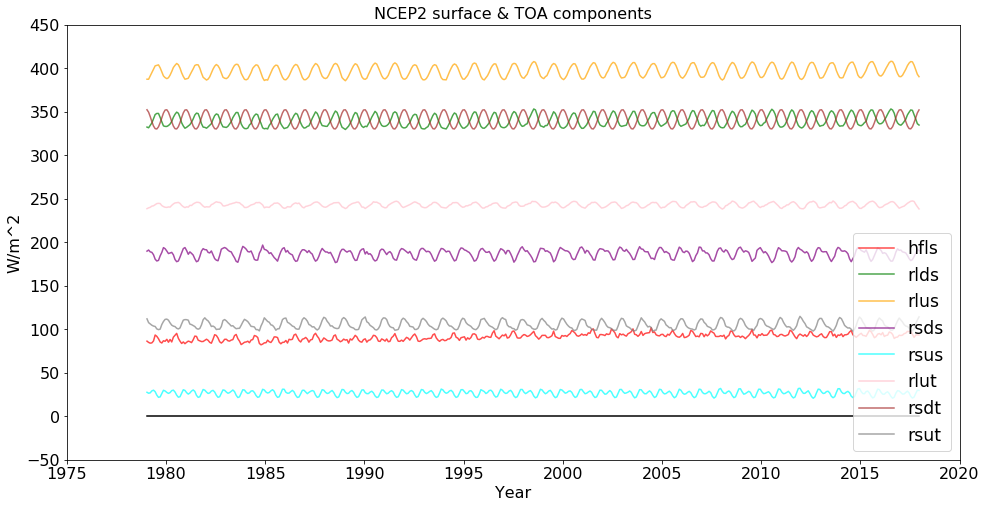

plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
series= 2
series= 3
plot_xy: series,xval_min,max= 3 1979.0409836065573 2017.9535519125684
plot_xy: series,yval_min,max= 3 -17.903792255492966 352.53858881275613
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7f624ccc4518>, <matplotlib.lines.Line2D object at 0x7f624ccc49b0>, <matplotlib.lines.Line2D object at 0x7f624ccc4e48>, <matplotlib.lines.Line2D object at 0x7f624cccd2e8>]
plot_xy: newlabels= ['rlut', 'rsdt', 'rsut', 'net down toa']


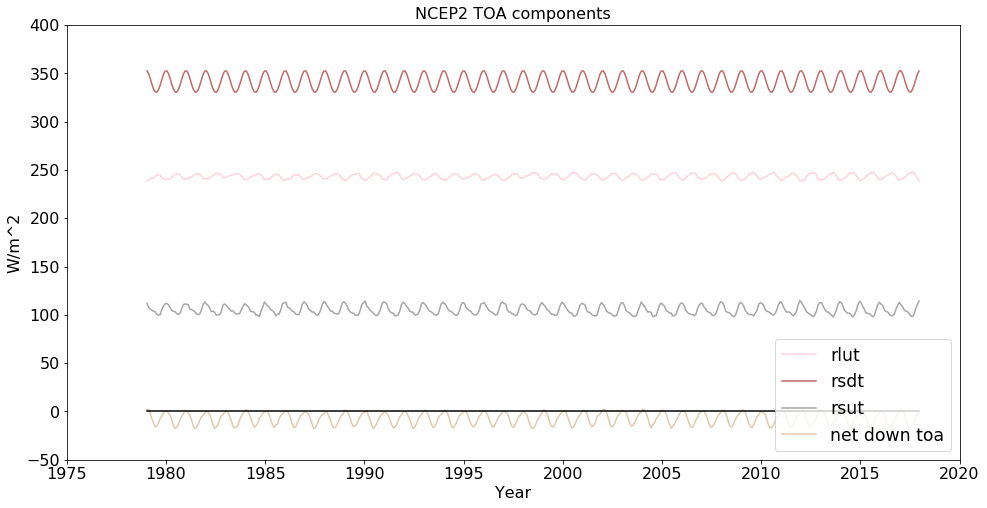

plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
series= 2
series= 3
series= 4
series= 5
plot_xy: series,xval_min,max= 5 1979.0409836065573 2017.9535519125684
plot_xy: series,yval_min,max= 5 -4.457466796168351 408.22230743227175
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7f624ccdd550>, <matplotlib.lines.Line2D object at 0x7f624cc80400>, <matplotlib.lines.Line2D object at 0x7f624cc80160>, <matplotlib.lines.Line2D object at 0x7f624cc80f98>, <matplotlib.lines.Line2D object at 0x7f624cced8d0>, <matplotlib.lines.Line2D object at 0x7f624cced1d0>]
plot_xy: newlabels= ['hfls', 'rlds', 'rlus', 'rsds', 'rsus', 'net down surf']


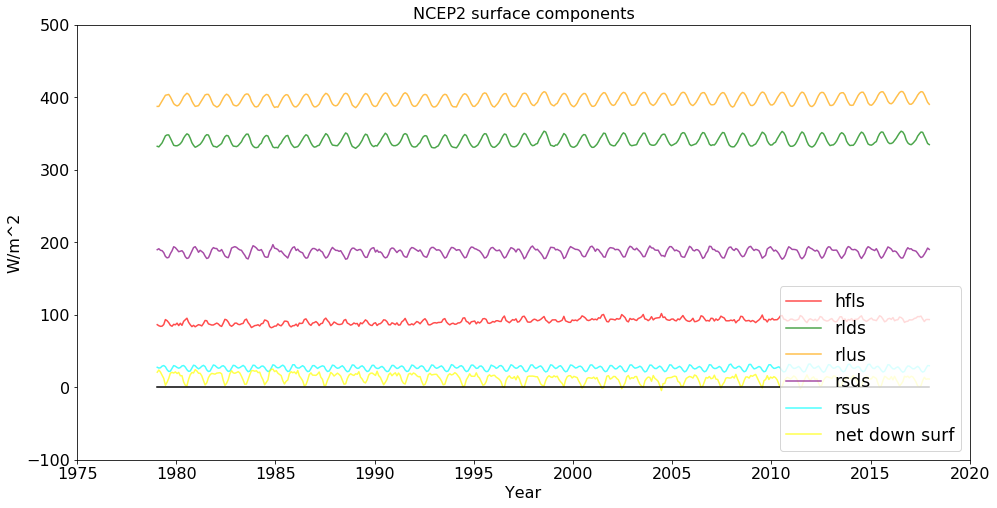

plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
plot_xy: series,xval_min,max= 1 1979.0409836065573 2017.9535519125684
plot_xy: series,yval_min,max= 1 -17.903792255492966 25.096601710974582
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7f6254f628d0>, <matplotlib.lines.Line2D object at 0x7f6254f6cd68>]
plot_xy: newlabels= ['net down surf', 'net down toa']


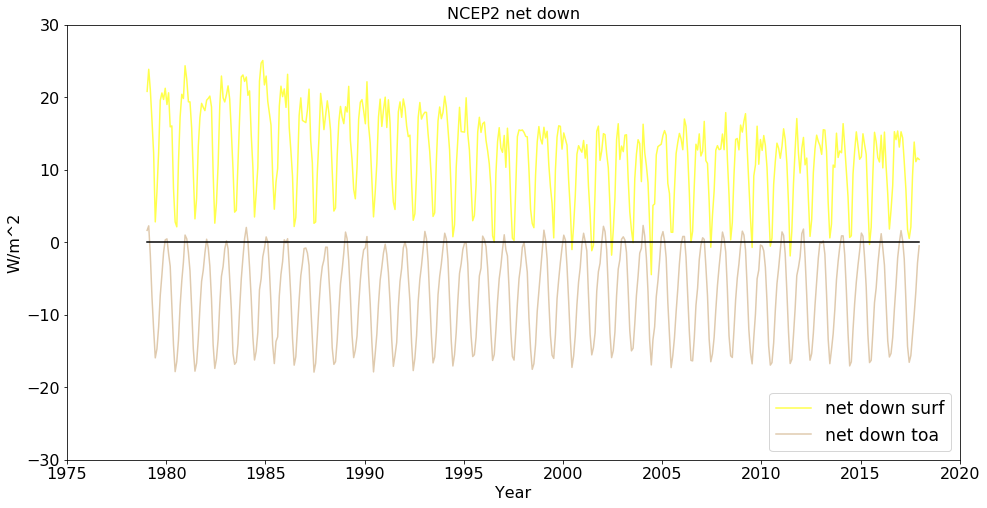

END


In [48]:
print('BEGIN')

################################################################################
#all components

#     input_datas = input_datas + (np.average(np.average(cafe_rlus_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
#     input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)
    
#ncep2_daily_files.year_fraction_anomaly
  
input_datas = ()
input_xvals = ()

#'hfss'
# ncep2_daily_files_hfls

# ncep2_daily_files_hfls.clat

line_colors,line_labels=[],[]
for flux in ['hfls','rlds','rlus','rsds','rsus','rlut','rsdt','rsut']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  
  if(flux=='hfls'):
    input_datas = input_datas + (np.average(np.average(ncep2_hfls_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_hfls.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_hfls.year_fraction_anomaly,)

#   elif(flux=='hfss'):
#     input_datas = input_datas + (np.average(np.average(ncep2_hfss_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_hfss.clat),axis=1),)
#     input_xvals = input_xvals + (ncep2_daily_files_hfss.year_fraction_anomaly,)

  elif(flux=='rlds'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlds_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rlds.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rlds.year_fraction_anomaly,)

  elif(flux=='rlus'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlus_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rlus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rlus.year_fraction_anomaly,)

  elif(flux=='rlut'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlut_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rlut.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rlut.year_fraction_anomaly,)

  elif(flux=='rsdt'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsdt_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsdt.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsdt.year_fraction_anomaly,)

  elif(flux=='rsus'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsus_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsus.year_fraction_anomaly,)

  elif(flux=='rsds'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsds_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsds.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsds.year_fraction_anomaly,)

  elif(flux=='rsut'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsut_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsut.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsut.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))

plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
  title='NCEP2 surface & TOA components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#top of atmosphere components

ncep2_netdowntoa_monthlyanomaly = \
  ncep2_rsdt_monthlyanomaly_from_daily - \
  ncep2_rsut_monthlyanomaly_from_daily - \
  ncep2_rlut_monthlyanomaly_from_daily

input_datas = ()
input_xvals = ()
  
line_colors,line_labels=[],[]
for flux in ['rlut','rsdt','rsut','net down toa']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  
  if(flux=='rlut'):
    input_datas = (np.average(np.average(ncep2_rlut_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rlut.clat),axis=1),)
    input_xvals = (ncep2_daily_files_rlut.year_fraction_anomaly,)

  elif(flux=='rsdt'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsdt_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsdt.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsdt.year_fraction_anomaly,)

  elif(flux=='rsut'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsut_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsut.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsut.year_fraction_anomaly,)

  elif(flux=='net down toa'):
    input_datas = input_datas + (np.average(np.average(ncep2_netdowntoa_monthlyanomaly,axis=1,weights=ncep2_daily_files_rsut.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsut.year_fraction_anomaly,)
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True, 
  input_data=input_datas, \
  input_xvals=input_xvals, \
  title='NCEP2 TOA components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#surface components

ncep2_netdownsurf_monthlyanomaly = \
  ncep2_rlds_monthlyanomaly_from_daily + \
  ncep2_rsds_monthlyanomaly_from_daily - \
  ncep2_rlus_monthlyanomaly_from_daily - \
  ncep2_rsus_monthlyanomaly_from_daily - \
  ncep2_hfls_monthlyanomaly_from_daily # - \
#   ncep2_hfss_monthlyanomaly_from_daily

input_datas = ()
input_xvals = ()

#'hfss'
line_colors,line_labels=[],[]
for flux in ['hfls','rlds','rlus','rsds','rsus','net down surf']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  if(flux=='hfls'):
    input_datas = (np.average(np.average(ncep2_hfls_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_hfls.clat),axis=1),)
    input_xvals = (ncep2_daily_files_hfls.year_fraction_anomaly,)
    
#   elif(flux=='hfss'):
#     input_datas = input_datas + (np.average(np.average(ncep2_hfss_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_hfss.clat),axis=1),)
#     input_xvals = input_xvals + (ncep2_daily_files_hfss.year_fraction_anomaly,)
    
  elif(flux=='rlds'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlds_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rlds.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rlds.year_fraction_anomaly,)
    
  elif(flux=='rlus'):
    input_datas = input_datas + (np.average(np.average(ncep2_rlus_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rlus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rlus.year_fraction_anomaly,)
    
  elif(flux=='rsds'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsds_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsds.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsds.year_fraction_anomaly,)
    
  elif(flux=='rsus'):
    input_datas = input_datas + (np.average(np.average(ncep2_rsus_monthlyanomaly_from_daily,axis=1,weights=ncep2_daily_files_rsus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsus.year_fraction_anomaly,)

  elif(flux=='net down surf'):
    input_datas = input_datas + (np.average(np.average(ncep2_netdownsurf_monthlyanomaly,axis=1,weights=ncep2_daily_files_rsus.clat),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsus.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True,\
  input_data=input_datas, \
  input_xvals=input_xvals, \
  title='NCEP2 surface components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

################################################################################

input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['net down surf','net down toa']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)

  if(flux=='net down surf'):
    input_datas = (np.average(np.average(ncep2_netdownsurf_monthlyanomaly,axis=1,weights=ncep2_daily_files_rsut.clat[:]),axis=1),)
    input_xvals = (ncep2_daily_files_rsut.year_fraction_anomaly,)
    
  elif(flux=='net down toa'):
    input_datas = input_datas + (np.average(np.average(ncep2_netdowntoa_monthlyanomaly,axis=1,weights=ncep2_daily_files_rsut.clat[:]),axis=1),)
    input_xvals = input_xvals + (ncep2_daily_files_rsut.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
  title='NCEP2 net down', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

################################################################################

print('END')

In [ ]:
print('BEGIN')

ZeroClim=True
ZeroClim=False

access13_calendar='proleptic_gregorian'

topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/g/data1/ua6/drstree/CMIP5/GCM/CSIRO-BOM/ACCESS1-3'

################################################################################

ifil_hfls=[[topdir+'/historical/mon/atmos/r1i1p1/hfls/latest/hfls_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]

access13_monthly_files=n_data_funcs(input_files=ifil_hfls,input_var_name='hfls')

access13_monthly_files.calculate_filedatetime_info(calendar=access13_calendar)

access13_monthly_files.get_latlon_info(Diag=False)

access13_monthly_hfls_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

access13_hfls_monthlyclimatology_from_monthly, access13_hfls_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
  Diag=False, input=access13_monthly_hfls_from_monthly, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2005)

print('access13_hfls_monthlyclimatology_from_monthly.shape=',access13_hfls_monthlyclimatology_from_monthly.shape)
  
################################################################################

ifil_hfss=[[topdir+'/historical/mon/atmos/r1i1p1/hfss/latest/hfss_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]

access13_monthly_files=n_data_funcs(input_files=ifil_hfss,input_var_name='hfss')

access13_monthly_files.calculate_filedatetime_info(calendar=access13_calendar)

access13_monthly_files.get_latlon_info(Diag=False)

access13_monthly_hfss_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

access13_hfss_monthlyclimatology_from_monthly, access13_hfss_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
  Diag=False, input=access13_monthly_hfss_from_monthly, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2005)

print('access13_hfss_monthlyclimatology_from_monthly.shape=',access13_hfss_monthlyclimatology_from_monthly.shape)

################################################################################

ifil_rlds=[[topdir+'/historical/mon/atmos/r1i1p1/rlds/latest/rlds_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]

access13_monthly_files=n_data_funcs(input_files=ifil_rlds,input_var_name='rlds')

access13_monthly_files.calculate_filedatetime_info(calendar=access13_calendar)

access13_monthly_files.get_latlon_info(Diag=False)

access13_monthly_rlds_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

access13_rlds_monthlyclimatology_from_monthly, access13_rlds_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
  Diag=False, input=access13_monthly_rlds_from_monthly, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2005)

print('access13_rlds_monthlyclimatology_from_monthly.shape=',access13_rlds_monthlyclimatology_from_monthly.shape)

################################################################################

ifil_rlus=[[topdir+'/historical/mon/atmos/r1i1p1/rlus/latest/rlus_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]

access13_monthly_files=n_data_funcs(input_files=ifil_rlus,input_var_name='rlus')

access13_monthly_files.calculate_filedatetime_info(calendar=access13_calendar)

access13_monthly_files.get_latlon_info(Diag=False)

access13_monthly_rlus_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

access13_rlus_monthlyclimatology_from_monthly, access13_rlus_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
  Diag=False, input=access13_monthly_rlus_from_monthly, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2005)

print('access13_rlus_monthlyclimatology_from_monthly.shape=',access13_rlus_monthlyclimatology_from_monthly.shape)

################################################################################

ifil_rlut=[[topdir+'/historical/mon/atmos/r1i1p1/rlut/latest/rlut_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]

access13_monthly_files=n_data_funcs(input_files=ifil_rlut,input_var_name='rlut')

access13_monthly_files.calculate_filedatetime_info(calendar=access13_calendar)

access13_monthly_files.get_latlon_info(Diag=False)

access13_monthly_rlut_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

access13_rlut_monthlyclimatology_from_monthly, access13_rlut_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
  Diag=False, input=access13_monthly_rlut_from_monthly, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2005)

print('access13_rlut_monthlyclimatology_from_monthly.shape=',access13_rlut_monthlyclimatology_from_monthly.shape)

################################################################################

ifil_rsdt=[[topdir+'/historical/mon/atmos/r1i1p1/rsdt/latest/rsdt_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]

access13_monthly_files=n_data_funcs(input_files=ifil_rsdt,input_var_name='rsdt')

access13_monthly_files.calculate_filedatetime_info(calendar=access13_calendar)

access13_monthly_files.get_latlon_info(Diag=False)

access13_monthly_rsdt_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

access13_rsdt_monthlyclimatology_from_monthly, access13_rsdt_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
  Diag=False, input=access13_monthly_rsdt_from_monthly, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2005)

print('access13_rsdt_monthlyclimatology_from_monthly.shape=',access13_rsdt_monthlyclimatology_from_monthly.shape)

################################################################################

ifil_rsus=[[topdir+'/historical/mon/atmos/r1i1p1/rsus/latest/rsus_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]

access13_monthly_files=n_data_funcs(input_files=ifil_rsus,input_var_name='rsus')

access13_monthly_files.calculate_filedatetime_info(calendar=access13_calendar)

access13_monthly_files.get_latlon_info(Diag=False)

access13_monthly_rsus_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

access13_rsus_monthlyclimatology_from_monthly, access13_rsus_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
  Diag=False, input=access13_monthly_rsus_from_monthly, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2005)

print('access13_rsus_monthlyclimatology_from_monthly.shape=',access13_rsus_monthlyclimatology_from_monthly.shape)

################################################################################

ifil_rsds=[[topdir+'/historical/mon/atmos/r1i1p1/rsds/latest/rsds_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]

access13_monthly_files=n_data_funcs(input_files=ifil_rsds,input_var_name='rsds')

access13_monthly_files.calculate_filedatetime_info(calendar=access13_calendar)

access13_monthly_files.get_latlon_info(Diag=False)

access13_monthly_rsds_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

access13_rsds_monthlyclimatology_from_monthly, access13_rsds_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
  Diag=False, input=access13_monthly_rsds_from_monthly, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2005)

print('access13_rsds_monthlyclimatology_from_monthly.shape=',access13_rsds_monthlyclimatology_from_monthly.shape)

################################################################################

ifil_rsut=[[topdir+'/historical/mon/atmos/r1i1p1/rsut/latest/rsut_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc']]

access13_monthly_files=n_data_funcs(input_files=ifil_rsut,input_var_name='rsut')

access13_monthly_files.calculate_filedatetime_info(calendar=access13_calendar)

access13_monthly_files.get_latlon_info(Diag=False)

access13_monthly_rsut_from_monthly=access13_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

access13_rsut_monthlyclimatology_from_monthly, access13_rsut_monthlyanomaly_from_monthly=access13_monthly_files.monthly_clim_anom( \
  Diag=False, input=access13_monthly_rsut_from_monthly, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2005)

print('access13_rsut_monthlyclimatology_from_monthly.shape=',access13_rsut_monthlyclimatology_from_monthly.shape)

################################################################################

print('END')

In [ ]:
print('BEGIN')

################################################################################
#all components

input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['hfls','hfss','rlds','rlus','rsds','rsus','rlut','rsdt','rsut']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  
  if(flux=='hfls'):
    input_datas = input_datas + (np.average(np.average(access13_hfls_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='hfss'):
    input_datas = input_datas + (np.average(np.average(access13_hfss_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='rlds'):
    input_datas = input_datas + (np.average(np.average(access13_rlds_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='rlus'):
    input_datas = input_datas + (np.average(np.average(access13_rlus_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='rlut'):
    input_datas = input_datas + (np.average(np.average(access13_rlut_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='rsdt'):
    input_datas = input_datas + (np.average(np.average(access13_rsdt_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='rsus'):
    input_datas = input_datas + (np.average(np.average(access13_rsus_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='rsds'):
    input_datas = input_datas + (np.average(np.average(access13_rsds_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='rsut'):
    input_datas = input_datas + (np.average(np.average(access13_rsut_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))

plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
  title='ACCESS1.3 surface & TOA components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#top of atmosphere components

access13_netdowntoa_monthlyanomaly = \
  access13_rsdt_monthlyanomaly_from_monthly - \
  access13_rsut_monthlyanomaly_from_monthly - \
  access13_rlut_monthlyanomaly_from_monthly

input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['rlut','rsdt','rsut','net down toa']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  
  if(flux=='rlut'):
    input_datas = (np.average(np.average(access13_rlut_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='rsdt'):
    input_datas = input_datas + (np.average(np.average(access13_rsdt_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='rsut'):
    input_datas = input_datas + (np.average(np.average(access13_rsut_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='net down toa'):
    input_datas = input_datas + (np.average(np.average(access13_netdowntoa_monthlyanomaly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
  title='ACCESS1.3 TOA components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#surface components

access13_netdownsurf_monthlyanomaly = \
  access13_rlds_monthlyanomaly_from_monthly + \
  access13_rsds_monthlyanomaly_from_monthly - \
  access13_rlus_monthlyanomaly_from_monthly - \
  access13_rsus_monthlyanomaly_from_monthly - \
  access13_hfls_monthlyanomaly_from_monthly - \
  access13_hfss_monthlyanomaly_from_monthly

input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['hfls','hfss','rlds','rlus','rsds','rsus','net down surf']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  if(flux=='hfls'):
    input_datas = (np.average(np.average(access13_hfls_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = (access13_monthly_files.year_fraction_anomaly,)
    
  elif(flux=='hfss'):
    input_datas = input_datas + (np.average(np.average(access13_hfss_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
    
  elif(flux=='rlds'):
    input_datas = input_datas + (np.average(np.average(access13_rlds_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
    
  elif(flux=='rlus'):
    input_datas = input_datas + (np.average(np.average(access13_rlus_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
    
  elif(flux=='rsds'):
    input_datas = input_datas + (np.average(np.average(access13_rsds_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
    
  elif(flux=='rsus'):
    input_datas = input_datas + (np.average(np.average(access13_rsus_monthlyanomaly_from_monthly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)

  elif(flux=='net down surf'):
    input_datas = input_datas + (np.average(np.average(access13_netdownsurf_monthlyanomaly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
  title='ACCESS1.3 surface components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

################################################################################

input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['net down surf','net down toa']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)

  if(flux=='net down surf'):
    input_datas = (np.average(np.average(access13_netdownsurf_monthlyanomaly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = (access13_monthly_files.year_fraction_anomaly,)
    
  elif(flux=='net down toa'):
    input_datas = input_datas + (np.average(np.average(access13_netdowntoa_monthlyanomaly,axis=1,weights=access13_monthly_files.clat),axis=1),)
    input_xvals = input_xvals + (access13_monthly_files.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
  title='ACCESS1.3 net down', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

################################################################################


print('END')

In [49]:
print('BEGIN')

ZeroClim=True
#ZeroClim=False

cafe_calendar='noleap'

topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'

################################################################################

ifil_hfls=[[topdir+'/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p13f1/day/hfls/gn/v20171025/hfls_day_historical_CAFE-1-0_r1i1p13f1_gn_19800101-20081231.nc']]

cafe_daily_files_aug18b=n_data_funcs(input_files=ifil_hfls,input_var_name='hfls')

cafe_daily_files_aug18b.calculate_filedatetime_info(calendar=cafe_calendar)

cafe_daily_files_aug18b.get_latlon_info(Diag=False)

cafe_hfls_daily_aug18b=cafe_daily_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

cafe_daily_files_aug18b.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

cafe_monthly_hfls_from_daily_aug18b=cafe_daily_files_aug18b.daily_to_monthly(EndOption=1,input=cafe_hfls_daily_aug18b)

cafe_hfls_monthlyclimatology_from_daily_aug18b, cafe_hfls_monthlyanomaly_from_daily_aug18b=cafe_daily_files_aug18b.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_hfls_from_daily_aug18b, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2008)

print('cafe_hfls_monthlyclimatology_from_daily_aug18b.shape=',cafe_hfls_monthlyclimatology_from_daily_aug18b.shape)
  
################################################################################

ifil_hfss=[[topdir+'/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p13f1/day/hfss/gn/v20171025/hfss_day_historical_CAFE-1-0_r1i1p13f1_gn_19800101-20081231.nc']]

cafe_daily_files_aug18b=n_data_funcs(input_files=ifil_hfss,input_var_name='hfss')

cafe_daily_files_aug18b.calculate_filedatetime_info(calendar=cafe_calendar)

cafe_daily_files_aug18b.get_latlon_info(Diag=False)

cafe_hfss_daily_aug18b=cafe_daily_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

cafe_daily_files_aug18b.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

cafe_monthly_hfss_from_daily_aug18b=cafe_daily_files_aug18b.daily_to_monthly(EndOption=1,input=cafe_hfss_daily_aug18b)

cafe_hfss_monthlyclimatology_from_daily_aug18b, cafe_hfss_monthlyanomaly_from_daily_aug18b=cafe_daily_files_aug18b.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_hfss_from_daily_aug18b, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2008)

print('cafe_hfss_monthlyclimatology_from_daily_aug18b.shape=',cafe_hfss_monthlyclimatology_from_daily_aug18b.shape)

################################################################################

ifil_rlds=[[topdir+'/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p13f1/day/rlds/gn/v20171025/rlds_day_historical_CAFE-1-0_r1i1p13f1_gn_19800101-20081231.nc']]

cafe_daily_files_aug18b=n_data_funcs(input_files=ifil_rlds,input_var_name='rlds')

cafe_daily_files_aug18b.calculate_filedatetime_info(calendar=cafe_calendar)

cafe_daily_files_aug18b.get_latlon_info(Diag=False)

cafe_rlds_daily_aug18b=cafe_daily_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

cafe_daily_files_aug18b.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

cafe_monthly_rlds_from_daily_aug18b=cafe_daily_files_aug18b.daily_to_monthly(EndOption=1,input=cafe_rlds_daily_aug18b)

cafe_rlds_monthlyclimatology_from_daily_aug18b, cafe_rlds_monthlyanomaly_from_daily_aug18b=cafe_daily_files_aug18b.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_rlds_from_daily_aug18b, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2008)

print('cafe_rlds_monthlyclimatology_from_daily_aug18b.shape=',cafe_rlds_monthlyclimatology_from_daily_aug18b.shape)

################################################################################

ifil_rlus=[[topdir+'/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p13f1/day/rlus/gn/v20171025/rlus_day_historical_CAFE-1-0_r1i1p13f1_gn_19800101-20081231.nc']]

cafe_daily_files_aug18b=n_data_funcs(input_files=ifil_rlus,input_var_name='rlus')

cafe_daily_files_aug18b.calculate_filedatetime_info(calendar=cafe_calendar)

cafe_daily_files_aug18b.get_latlon_info(Diag=False)

cafe_rlus_daily_aug18b=cafe_daily_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

cafe_daily_files_aug18b.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

cafe_monthly_rlus_from_daily_aug18b=cafe_daily_files_aug18b.daily_to_monthly(EndOption=1,input=cafe_rlus_daily_aug18b)

cafe_rlus_monthlyclimatology_from_daily_aug18b, cafe_rlus_monthlyanomaly_from_daily_aug18b=cafe_daily_files_aug18b.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_rlus_from_daily_aug18b, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2008)

print('cafe_rlus_monthlyclimatology_from_daily_aug18b.shape=',cafe_rlus_monthlyclimatology_from_daily_aug18b.shape)

################################################################################

ifil_rlut=[[topdir+'/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p13f1/day/rlut/gn/v20171025/rlut_day_historical_CAFE-1-0_r1i1p13f1_gn_19800101-20081231.nc']]

cafe_daily_files_aug18b=n_data_funcs(input_files=ifil_rlut,input_var_name='rlut')

cafe_daily_files_aug18b.calculate_filedatetime_info(calendar=cafe_calendar)

cafe_daily_files_aug18b.get_latlon_info(Diag=False)

cafe_rlut_daily_aug18b=cafe_daily_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

cafe_daily_files_aug18b.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

cafe_monthly_rlut_from_daily_aug18b=cafe_daily_files_aug18b.daily_to_monthly(EndOption=1,input=cafe_rlut_daily_aug18b)

cafe_rlut_monthlyclimatology_from_daily_aug18b, cafe_rlut_monthlyanomaly_from_daily_aug18b=cafe_daily_files_aug18b.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_rlut_from_daily_aug18b, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2008)

print('cafe_rlut_monthlyclimatology_from_daily_aug18b.shape=',cafe_rlut_monthlyclimatology_from_daily_aug18b.shape)

################################################################################

ifil_rsdt=[[topdir+'/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p13f1/Amon/rsdt/gn/v20171025/rsdt_Amon_historical_CAFE-1-0_r1i1p13f1_gn_198001-200812.nc']]

cafe_monthly_files_aug18b=n_data_funcs(input_files=ifil_rsdt,input_var_name='rsdt')

cafe_monthly_files_aug18b.calculate_filedatetime_info(calendar=cafe_calendar)

cafe_monthly_files_aug18b.get_latlon_info(Diag=False)

cafe_monthly_rsdt_from_monthly_aug18b=cafe_monthly_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

cafe_rsdt_monthlyclimatology_from_monthly_aug18b, cafe_rsdt_monthlyanomaly_from_monthly_aug18b=cafe_monthly_files_aug18b.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_rsdt_from_monthly_aug18b, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2008)

print('cafe_rsdt_monthlyclimatology_from_monthly_aug18b.shape=',cafe_rsdt_monthlyclimatology_from_monthly_aug18b.shape)

################################################################################

ifil_rsus=[[topdir+'/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p13f1/Amon/rsus/gn/v20171025/rsus_Amon_historical_CAFE-1-0_r1i1p13f1_gn_198001-200812.nc']]

cafe_monthly_files_aug18b=n_data_funcs(input_files=ifil_rsus,input_var_name='rsus')

cafe_monthly_files_aug18b.calculate_filedatetime_info(calendar=cafe_calendar)

cafe_monthly_files_aug18b.get_latlon_info(Diag=False)

cafe_monthly_rsus_from_monthly_aug18b=cafe_monthly_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

cafe_rsus_monthlyclimatology_from_monthly_aug18b, cafe_rsus_monthlyanomaly_from_monthly_aug18b=cafe_monthly_files_aug18b.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_rsus_from_monthly_aug18b, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2008)

print('cafe_rsus_monthlyclimatology_from_monthly_aug18b.shape=',cafe_rsus_monthlyclimatology_from_monthly_aug18b.shape)

################################################################################

ifil_rsds=[[topdir+'/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p13f1/Amon/rsds/gn/v20171025/rsds_Amon_historical_CAFE-1-0_r1i1p13f1_gn_198001-200812.nc']]

cafe_monthly_files_aug18b=n_data_funcs(input_files=ifil_rsds,input_var_name='rsds')

cafe_monthly_files_aug18b.calculate_filedatetime_info(calendar=cafe_calendar)

cafe_monthly_files_aug18b.get_latlon_info(Diag=False)

cafe_monthly_rsds_from_monthly_aug18b=cafe_monthly_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

cafe_rsds_monthlyclimatology_from_monthly_aug18b, cafe_rsds_monthlyanomaly_from_monthly_aug18b=cafe_monthly_files_aug18b.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_rsds_from_monthly_aug18b, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2008)

print('cafe_rsds_monthlyclimatology_from_monthly_aug18b.shape=',cafe_rsds_monthlyclimatology_from_monthly_aug18b.shape)

################################################################################

ifil_rsut=[[topdir+'/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p13f1/Amon/rsut/gn/v20171025/rsut_Amon_historical_CAFE-1-0_r1i1p13f1_gn_198001-200812.nc']]

cafe_monthly_files_aug18b=n_data_funcs(input_files=ifil_rsut,input_var_name='rsut')

cafe_monthly_files_aug18b.calculate_filedatetime_info(calendar=cafe_calendar)

cafe_monthly_files_aug18b.get_latlon_info(Diag=False)

cafe_monthly_rsut_from_monthly_aug18b=cafe_monthly_files_aug18b.calculate_quantity('dummy', quantity='latlon_region')

cafe_rsut_monthlyclimatology_from_monthly_aug18b, cafe_rsut_monthlyanomaly_from_monthly_aug18b=cafe_monthly_files_aug18b.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_rsut_from_monthly_aug18b, AnnOut=False, ZeroClim=ZeroClim, \
  cbeg=1981, cend=2000, abeg=1980, aend=2008)

print('cafe_rsut_monthlyclimatology_from_monthly_aug18b.shape=',cafe_rsut_monthlyclimatology_from_monthly_aug18b.shape)

################################################################################

print('END')

BEGIN
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.
cafe_hfls_monthlyclimatology_from_daily_aug18b.shape= (12, 90, 144)
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.
cafe_hfss_monthlyclimatology_from_daily_aug18b.shape= (12, 90, 144)
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
daily_to_monthly: Discarding beg&/end month i

BEGIN
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
series= 2
series= 3
series= 4
series= 5
series= 6
series= 7
series= 8
plot_xy: series,xval_min,max= 8 1980.042349726776 2008.954918032787
plot_xy: series,yval_min,max= 8 15.82148547642285 409.4361528837526
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7f62573e0160>, <matplotlib.lines.Line2D object at 0x7f62573f4438>, <matplotlib.lines.Line2D object at 0x7f62573f4b70>, <matplotlib.lines.Line2D object at 0x7f62573f49e8>, <matplotlib.lines.Line2D object at 0x7f62573f4080>, <matplotlib.lines.Line2D object at 0x7f6255844a90>, <matplotlib.lines.Line2D object at 0x7f62558444e0>, <matplotlib.lines.Line2D object at 0x7f62558449e8>, <matplotlib.lines.Line2D object at 0x7f62572c

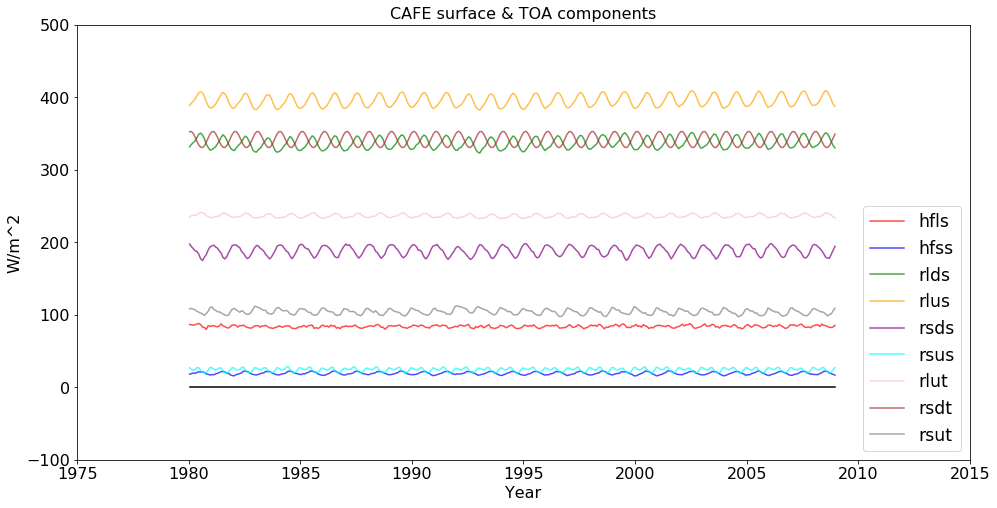

plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
series= 2
series= 3
plot_xy: series,xval_min,max= 3 1980.042349726776 2008.954918032787
plot_xy: series,yval_min,max= 3 -12.744199293626746 352.96498256454356
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7f6255132518>, <matplotlib.lines.Line2D object at 0x7f6257164c50>, <matplotlib.lines.Line2D object at 0x7f6257164320>, <matplotlib.lines.Line2D object at 0x7f6257164da0>]
plot_xy: newlabels= ['rlut', 'rsdt', 'rsut', 'net down toa']


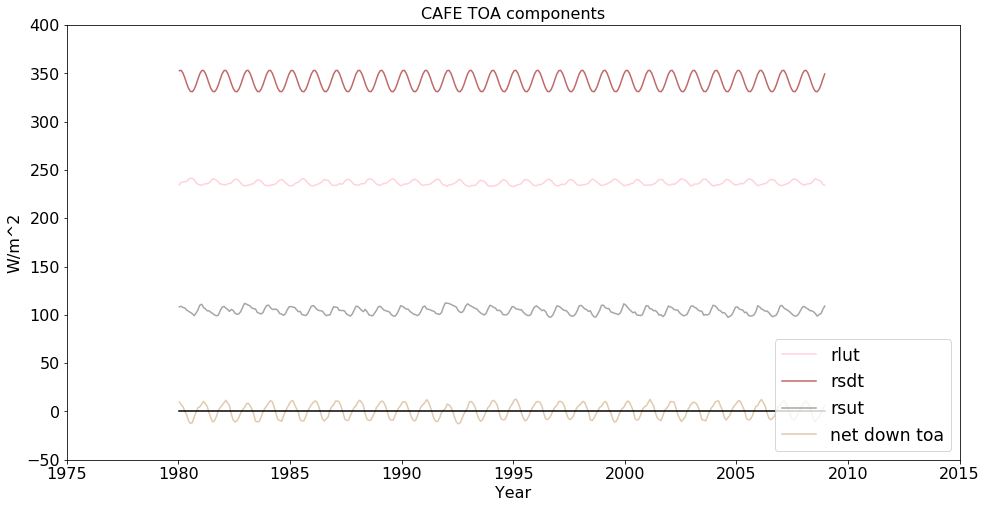

plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
series= 2
series= 3
series= 4
series= 5
series= 6
plot_xy: series,xval_min,max= 6 1980.042349726776 2008.954918032787
plot_xy: series,yval_min,max= 6 -13.545954676105671 409.4361528837526
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7f62556f9ef0>, <matplotlib.lines.Line2D object at 0x7f62556f93c8>, <matplotlib.lines.Line2D object at 0x7f62556f9198>, <matplotlib.lines.Line2D object at 0x7f6238807c88>, <matplotlib.lines.Line2D object at 0x7f6238807908>, <matplotlib.lines.Line2D object at 0x7f62571830b8>, <matplotlib.lines.Line2D object at 0x7f6257183d30>]
plot_xy: newlabels= ['hfls', 'hfss', 'rlds', 'rlus', 'rsds', 'rsus', 'net down surf']


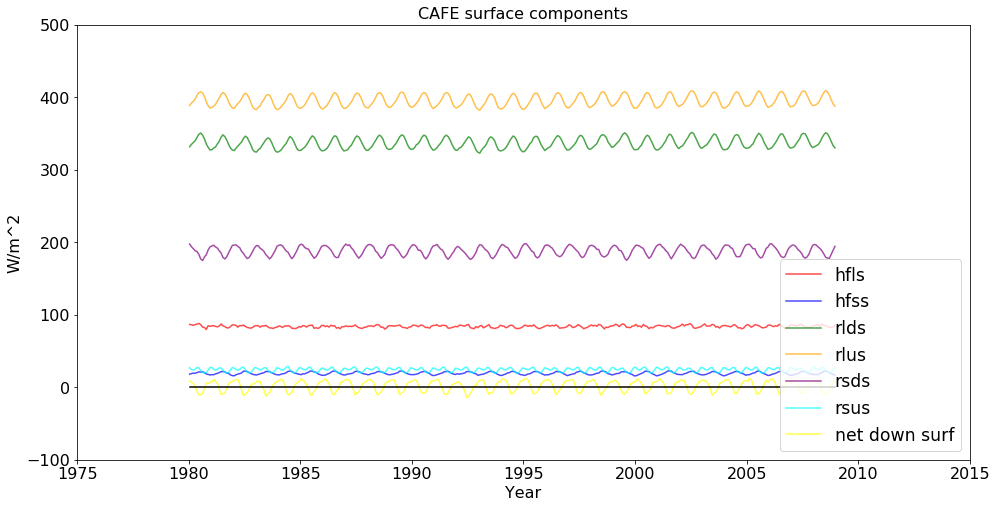

plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
Inputing units.
Adding xlabel.
Adding ylabel.
Adding zero line over min/max of input datas.
Inputing xsize,ysize.
Adding line colors.
Adding line labels for legend.
plot_xy: many sets of data.
series= 0
series= 1
plot_xy: series,xval_min,max= 1 1980.042349726776 2008.954918032787
plot_xy: series,yval_min,max= 1 -13.545954676105671 12.843641326815545
plot_xy: newhandles= [<matplotlib.lines.Line2D object at 0x7f625543e048>, <matplotlib.lines.Line2D object at 0x7f6255770630>]
plot_xy: newlabels= ['net down surf', 'net down toa']


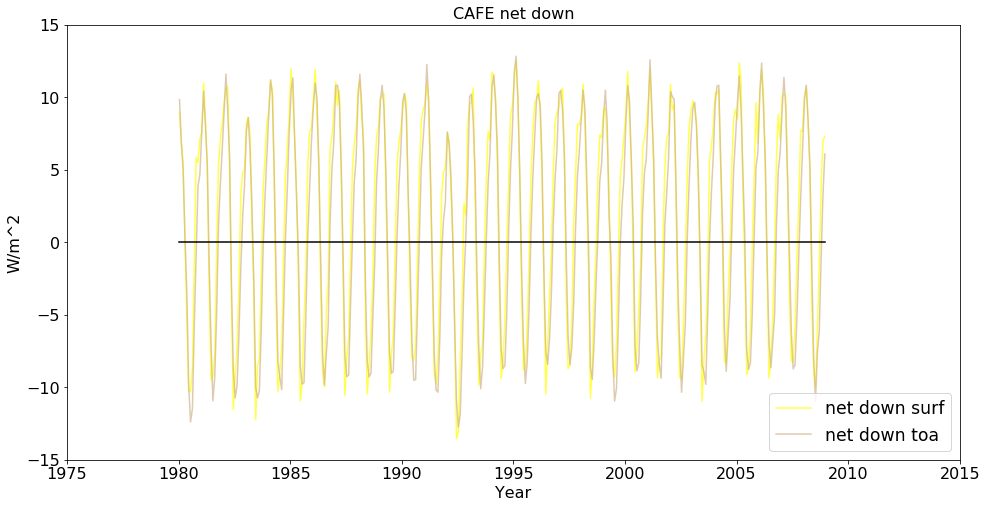

END


In [50]:
print('BEGIN')

################################################################################
#all components

input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['hfls','hfss','rlds','rlus','rsds','rsus','rlut','rsdt','rsut']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  
  if(flux=='hfls'):
    input_datas = input_datas + (np.average(np.average(cafe_hfls_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)

  elif(flux=='hfss'):
    input_datas = input_datas + (np.average(np.average(cafe_hfss_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)

  elif(flux=='rlds'):
    input_datas = input_datas + (np.average(np.average(cafe_rlds_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)

  elif(flux=='rlus'):
    input_datas = input_datas + (np.average(np.average(cafe_rlus_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)

  elif(flux=='rlut'):
    input_datas = input_datas + (np.average(np.average(cafe_rlut_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)

  elif(flux=='rsdt'):
    input_datas = input_datas + (np.average(np.average(cafe_rsdt_monthlyanomaly_from_monthly_aug18b,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)

  elif(flux=='rsus'):
    input_datas = input_datas + (np.average(np.average(cafe_rsus_monthlyanomaly_from_monthly_aug18b,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)

  elif(flux=='rsds'):
    input_datas = input_datas + (np.average(np.average(cafe_rsds_monthlyanomaly_from_monthly_aug18b,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)

  elif(flux=='rsut'):
    input_datas = input_datas + (np.average(np.average(cafe_rsut_monthlyanomaly_from_monthly_aug18b,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))

plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
  title='CAFE surface & TOA components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#top of atmosphere components

cafe_netdowntoa_monthlyanomaly = \
  cafe_rsdt_monthlyanomaly_from_monthly_aug18b - \
  cafe_rsut_monthlyanomaly_from_monthly_aug18b - \
  cafe_rlut_monthlyanomaly_from_daily_aug18b

input_datas = ()
input_xvals = ()
  
line_colors,line_labels=[],[]
for flux in ['rlut','rsdt','rsut','net down toa']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  
  if(flux=='rlut'):
    input_datas = (np.average(np.average(cafe_rlut_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = (cafe_daily_files_aug18b.year_fraction_anomaly,)

  elif(flux=='rsdt'):
    input_datas = input_datas + (np.average(np.average(cafe_rsdt_monthlyanomaly_from_monthly_aug18b,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)

  elif(flux=='rsut'):
    input_datas = input_datas + (np.average(np.average(cafe_rsut_monthlyanomaly_from_monthly_aug18b,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)

  elif(flux=='net down toa'):
    input_datas = input_datas + (np.average(np.average(cafe_netdowntoa_monthlyanomaly,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
  title='CAFE TOA components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################
#surface components

cafe_netdownsurf_monthlyanomaly = \
  cafe_rlds_monthlyanomaly_from_daily_aug18b + \
  cafe_rsds_monthlyanomaly_from_monthly_aug18b - \
  cafe_rlus_monthlyanomaly_from_daily_aug18b - \
  cafe_rsus_monthlyanomaly_from_monthly_aug18b - \
  cafe_hfls_monthlyanomaly_from_daily_aug18b - \
  cafe_hfss_monthlyanomaly_from_daily_aug18b

input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['hfls','hfss','rlds','rlus','rsds','rsus','net down surf']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)
  if(flux=='hfls'):
    input_datas = (np.average(np.average(cafe_hfls_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = (cafe_daily_files_aug18b.year_fraction_anomaly,)
    
  elif(flux=='hfss'):
    input_datas = input_datas + (np.average(np.average(cafe_hfss_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)
    
  elif(flux=='rlds'):
    input_datas = input_datas + (np.average(np.average(cafe_rlds_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)
    
  elif(flux=='rlus'):
    input_datas = input_datas + (np.average(np.average(cafe_rlus_monthlyanomaly_from_daily_aug18b,axis=1,weights=cafe_daily_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_daily_files_aug18b.year_fraction_anomaly,)
    
  elif(flux=='rsds'):
    input_datas = input_datas + (np.average(np.average(cafe_rsds_monthlyanomaly_from_monthly_aug18b,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)
    
  elif(flux=='rsus'):
    input_datas = input_datas + (np.average(np.average(cafe_rsus_monthlyanomaly_from_monthly_aug18b,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)

  elif(flux=='net down surf'):
    input_datas = input_datas + (np.average(np.average(cafe_netdownsurf_monthlyanomaly,axis=1,weights=cafe_monthly_files_aug18b.clat),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
  title='CAFE surface components', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

################################################################################

input_datas = ()
input_xvals = ()

line_colors,line_labels=[],[]
for flux in ['net down surf','net down toa']:
  line_colors.append(fluxes_colors[flux])
  line_labels.append(flux)

  if(flux=='net down surf'):
    input_datas = (np.average(np.average(cafe_netdownsurf_monthlyanomaly,axis=1,weights=cafe_monthly_files_aug18b.clat[:]),axis=1),)
    input_xvals = (cafe_monthly_files_aug18b.year_fraction_anomaly,)
    
  elif(flux=='net down toa'):
    input_datas = input_datas + (np.average(np.average(cafe_netdowntoa_monthlyanomaly,axis=1,weights=cafe_monthly_files_aug18b.clat[:]),axis=1),)
    input_xvals = input_xvals + (cafe_monthly_files_aug18b.year_fraction_anomaly,)
    
  else:
    raise SystemExit('Flux not known,'+flux+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
  title='CAFE net down', \
  units='W/m^2', \
  xlab='Year', \
  ylab='W/m^2', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=line_colors, \
  line_labels=line_labels \
  )

################################################################################


print('END')